<a id='title'></a> 
# Описание проекта "Исследование объявлений о продаже квартир".

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

В рамках проекта требуется установить параметры для будущей модели. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы над проектом.

Работу над проектом будем осуществлять в следующем порядке:

### Этап 1. Импорт библиотек, считывание и первичный анализ данных:

<a href='#1.1'>1.1. Импорт библиотек, считывание и первичный анализ данных.</a> 

### Этап 2. Предобработка данных:

<a href='#2.1'>2.1. Преобразование типов данных.</a> 

<a href='#2.1.1'>2.1.1. Преобразование поля "last_price".</a> 

<a href='#2.1.2'>2.1.2. Преобразование поля "first_day_exposition".</a> 

<a href='#2.1.3'>2.1.3. Преобразование полей "floors_total", "balcony", "parks_around3000", "ponds_around3000", "days_exposition", "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest".</a> 

<a href='#2.2'>2.2. Обработка аномалий.</a> 

<a href='#2.2.1'>2.2.1. Обработка аномалий в столбце "rooms".</a> 

<a href='#2.2.2'>2.2.2. Обработка аномалий в столбце "ceiling_height".</a> 

<a href='#2.2.3'>2.2.3. Обработка аномалий в столбце "balcony".</a> 

<a href='#2.3'>2.3. Обработка дубликатов.</a> 

<a href='#2.4'>2.4. Обработка пропущенных значений.</a> 

<a href='#2.4.1'>2.4.1. Обработка пропущенных значений в полях "locality_name" и "floors_total".</a> 

<a href='#2.4.2'>2.4.2. Обработка пропущенных значений в полях "living_area" и "kitchen_area".</a> 

<a href='#2.4.3'>2.4.3. Обработка пропущенных значений в поле "is_apartment".</a> 

<a href='#2.4.4'>2.4.4. Обработка пропущенных значений в поле "balcony"..</a> 

<a href='#2.4.5'>2.4.5. Обработка пропущенных значений в поле "ceiling_height".</a> 

<a href='#2.4.6'>2.4.6. Обработка пропущенных значений в поле "days_exposition".</a> 

<a href='#2.4.7'>2.4.7. Обработка пропущенных значений в полях "airports_nearest", "cityCenters_nearest", "parks_nearest" и "ponds_nearest".</a> 

<a href='#2.4.8'>2.4.8. Обработка пропущенных значений в полях "parks_around3000" и "ponds_around3000".</a> 

### Этап 3. Добавление новых признаков:

<a href='#3.1'>3.1. Новый признак "Цена квадратного метра".</a> 

<a href='#3.2'>3.2. Новые признаки "День недели, месяц и год публикации объявления".</a> 

<a href='#3.3'>3.3. Новый признак "Этаж квартиры".</a>  

<a href='#3.4'>3.4. Новые признаки "Соотношение жилой и общей площади" и "Соотношение площади кухни и общей площади".</a>  

<a href='#3.1'>3.1. Новый признак "Цена квадратного метра".</a> 

### Этап 4. Исследовательский анализ данных: 

<a href='#4.1'>4.1. Изучение параметров: площадь, цена, число комнат, высота потолков.</a> 

<a href='#4.2'>4.2. Изучение времени продажи квартиры.</a> 

<a href='#4.3'>4.3. Устранение аномалий.</a> 

<a href='#4.4'>4.4. Оценка стоимости квартиры.</a> 

<a href='#4.5'>4.5. Рейтинг населённых пунктов.</a> 

<a href='#4.6'>4.6. Определение центра области.</a> 

<a href='#4.7'>4.7. Выделение сегмента цен.</a> 

<a id='1.1'></a> 
# Этап 1. Импорт библиотек, считывание и первичный анализ данных.

Иморитриуем нужные библиотеки.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Считаем набор данных.

In [1]:
df = pd.read_csv('real_estate_data.csv')
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Видим, что с данными что-то не так. Вероятно, в ходе некачественной выгрузки данных из системы они "склеились" в единую строку и в текущем виде не представляю никакой ценности для анализа. 

Чтобы иметь возможнность работать с данными, необходимо разделить "склеенные" данные на столбцы. 

При этом визуально видим, что в качестве разделителя данных по столбцам используется символ табуляции "\t", который и необходимо передать в качестве аргумента параметру sep.

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t', decimal='.')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Оценим размер набора данных.

In [3]:
df.shape

(23699, 22)

Изучим общую информацию о данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим на уникальные значения в каждом столбце набора данных.

In [6]:
for column in list(df.columns):
    print(column)
    print(df[column].value_counts())
    print('----------------------------------------------------------------------')
    print()

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
----------------------------------------------------------------------

last_price
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
----------------------------------------------------------------------

total_area
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
1

Посмотрим, есть ли пропуски в наборе данных.

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Вывод по этапу 1.

Изучаемый набор данных состоит из 22 колонок.  

Метод shape шепчет, что максимальное количество записей в поле составляет 23699, однако метод info показывает, что количество записей от поля к полю изменяется: где-то пропущена лишь часть данных, а в каких-то полях основная часть содержимого - пропуски. Их природу попытаемся выяснить несколько позже. 

Типы данных в изучаемом наборе данных:

дробные числа (с плавающей точкой) - 14 колонок;
целые числа - 3 колонки;
категориальные поля - 3 колонки;
логические поля (булев тип данных) - 2 колонки. 

Конструкция values_count вкупе с циклом позволяет предварительно проанализировать поля набора данных на наличие каких-либо аномальных значений, при этом избавляет от необходимости прописывать отдельные строки кода для каждого поля набора данных.

В наборе данных содержится большое количество пропусков, которые необходимо будет обработать.

Предварительно - "исходя из моего ощущения цифрового анализа" - можно отметить следующие необычные вещи в данных, на которые следовало бы обратить внимание в ходе дальшейшего анализа:

1. Данные в поле last_price приведены в рублях. Для помещений с небольшой стоимостью это выглядит нормально, но для лакшери апартаментов цифра смотрится крайне вырвиглазно. Целесообразно будет свести эту колонку, например, в тысячи или миллионы. Так как преобразование линейное, на зависимости между данными это не повлияет, а визуально или графически информацию будет воспринмать проще.


2. Данные в поле first_day_exposition приведены в не очень удобном для восприятия (и, потенциально, для дальшейнего анализа) формате. Для удобства стоит перевести тип данных в этом поле в дату в формате "ДД.ММ.ГГГГ ЧЧ:ММ:СС".


3. Данные поля rooms выглядят довольно странно: несложно представить жилое помещение с 3-4 комнатами, если очень напрячь фантазию, абстрагироваться от здравого смысла и представить, что там живёт цыганский табор с отдельной комнатой под стойла - 5-6. Количество комнат от 7 и выше, а уж тем паче - 19 (это максимальное количество комнат в наборе данных) - что-то за гранью фантастики. Возможно, стоит проанализировать какие-то зависимости между этими данными и привести их в порядок, если адекватные зависимости выявлены не будут. При этом в поле также есть значение, равное нулю, однако в контексте жилой недвижимости будет считать, что это просто квартира-студия, в которой и комнат-то нет. Или это одна большая комната.


4. Данные поля ceiling_height также кажутся доволно странными. В рамках экспермиента была сделала сортировка поля ceiling_height со значением "больше 5", чтобы узнать наиболее подозрительные данные в поле. Это позволило прийти к следующему выводу: значения до 5 метров (на мой взгляд, в целом довольно адекватная цифра) занимают основную долю данных в этом поле. После же 5 метров начинается нечто невообразимое: тут есть высота потолков и в 10 метров, что больше характерно для промышленного ангара, чем для некоммерческой жилплощади в Питере, и даже 100 метров, а это уже почти небоскрёб (отмечу, что всего таких аномальных потоков с высотой более 5 метров у нас 36, а это менее 1% от количества записей в целом). С другой стороны, есть и совсем крохотные потолки едва ли выше 2 метров. Будем исходить из допущения, что нормальной будем считать квартиру, где высота потолка находится в диапазоне от 3 до 5 метров включительно.


5. Поле balcony содержит весьма разношёрстную информацию: там есть и нулевые значения, есть пропущенные значения, а есть значения 3, 4, 5. Это кажется что-то непонятным, от чего следует избавиться, так как квартир с таким количеством балконов немного.

<a href='#title'>К оглавлению.</a> 

# Этап 2. Предобработка данных

Определим для себя следующую последовательность в преобработке данных:

1. Преобразование типов данных.

2. Работа с аномалиями.

3. Работа с дубликатами.

4. Работа с пропущенными значениями.

<a id='2.1'></a> 
## Этап 2.1. Преобразование типов данных.

Первым шагом в предобработке данных является преобразование типов данных.

В рамках этого шага преобразуем данные в полях:
- last_price;
- first_day_exposition;
- floors_total; 
- balcony; 
- parks_around3000; 
- ponds_around3000; 
- days_exposition; 
- airports_nearest; 
- cityCenters_nearest; 
- parks_nearest; 
- ponds_nearest.

<a id='2.1.1'></a> 
### Этап 2.1.1. Преобразование поля "last_price".

Начнём с поля last_price. Напомним, что ранее пришли к выводу о целесообразности его сведения к значениям, измеряющимся в тысячах или  миллионах.

Чтобы определиться, к какой размерности сводить данные, посмотрим на максимальное, минимальное и медианное значения в этом поле.

In [8]:
print(df['last_price'].max())
print(df['last_price'].min())
print(df['last_price'].median())

763000000.0
12190.0
4650000.0


Видим, что максимальное значение исчисляется 763 миллионами, минимальное - 12 тысячами, медиана же уютно расположилась в районе 4,65 миллионов. Узнаем, сколько в поле значений меньше миллиона.

In [9]:
df.query('last_price < 1000000')['last_price'].count()

225

Видим, что их всего лишь 225. Не так много. Поэтому условимся, что данные сводим всё-таки к миллионам. При этом округлим значение до 2 знаков после запятой.

Проверим значения поля до преобразования.

In [10]:
df['last_price'].head(10)

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
5     2890000.0
6     3700000.0
7     7915000.0
8     2900000.0
9     5400000.0
Name: last_price, dtype: float64

Выполним само преобразование

In [11]:
df['last_price'] = round((df['last_price'] / 1000000), 2)

Проверим значения поля после преобразования.

In [12]:
df['last_price'].head(10)

0    13.00
1     3.35
2     5.20
3    64.90
4    10.00
5     2.89
6     3.70
7     7.92
8     2.90
9     5.40
Name: last_price, dtype: float64

Теперь всё выглядит красиво. Ставим галочку, хвалим себя, кушаем сахарок и едем дальше.

<a href='#title'>К оглавлению.</a> 

<a id='2.1.2'></a> 
### Этап 2.1.2. Преобразование поля "first_day_exposition".


А дальше у нас преобразование поля first_day_exposition. Напомним, что логичным будет привести значения поля к формату "ДД.ММ.ГГГГ ЧЧ:ММ:СС".

Так займёмся же этим!

Сначала посмотрим на поле до преобразования.

In [13]:
df['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

Для преобразования воспользуемся методом to_datetime, применим его к полю first_day_exposition.

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y.%m.%dT%H:%M:%S')

Сначала посмотрим на поле после преобразования.

In [15]:
df['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

Теперь всё красиво. Отмечу, что метод to_datetime преобразовал данные в поле в формат datetime, в этом формате они сохранены после преобразования. Вместе с тем в наборе данных мы видим данные в формате date, но лишь потому, что время в было в формате 00:00:00, поэтому оно отсеклось.

<a href='#title'>К оглавлению.</a> 

<a id='2.1.3'></a> 
### Этап 2.1.3. Преобразование полей "floors_total", "balcony", "parks_around3000", "ponds_around3000", "days_exposition", "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest".

Указанные выше поля являются типом данных float, хотя из соображений семантики более приемлемый для них тип данных - int. К примеру, не может быть 2.3 балкона, но может быть 2 балкона. Кроме того, поля, описывающие расстояние от квартиры до какого-либо объекта, указанные на текущий момент в метрах, переведём в километры с округлением до целого значения.

Вместе с тем на текущий момент реализация этого направления преобразования невозможна, так как в этих полях содержатся пропущенные значения, которые нельзя преобразовать в int, поэтому преобразование этих полей в тип int, также переход от метров к километрам выполним после обработки пропущенных значений.

<a href='#title'>К оглавлению.</a> 

<a id='2.2'></a> 
## Этап 2.2. Обработка аномалий.

Следующий этап в предварительной обработке данных - обработка аномалий.

Напомним, что аномальные значения были выявлены в следующих полях:

- rooms;

- ceiling_height;

- balcony.

<a id='2.2.1'></a> 
### Этап 2.2.1. Обработка аномалий в столбце "rooms".

Рассмотрим комнаты. Напомню, что ранее отмечалось аномальное количество комнат, которое порою превышает даже 10. 

Для начала обратимся к гистограмме и посмотрим, как распределены данные в этом аномальном поле. Количество корзин определяем методом перебора.

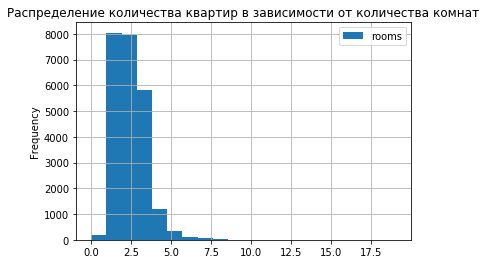

In [16]:
df['rooms'].plot(title = 'Распределение количества квартир в зависимости от количества комнат', 
                                          kind = 'hist', bins = 20, legend = True, grid = True, range = (0, 19))

После серии испытаний оптимальное количество корзин определилось как 20. На графике видим, что основная масса квартир - это квартиры, в которых количество комнат варьируется от 1 до 3. После этого количества комнат распределение квартир устремляется вниз, а после 6 комнат синие полосочки уже сложно отделять от оси графика.

Гистограмма подверждает изначальное предположение о том, что нормальным количеством комнат можно считать 5. От остальных целесообразно избавиться, так как их не очень-то и много. Однако чтобы наверняка удостовериться в незначительной концентрацией квартир с количеством комнат, превыщающих 6, посчитаем их количество.

In [17]:
df.query('rooms > 5')['rooms'].count()

195

Видим, что таких квартир всего 195, что значительно ниже 1% от общего количества записей. 

Отмечу, что в условие отбора также добавляю параметр .isna(), чтобы не отсечь пропущенные значения, работать с которыми мы будем несколько позднее.

In [18]:
df = df.query('rooms <= 5 or rooms.isna()')

Посмотрим, как изменилось распределение квартир. Отмечу, что так как у нас убрался хвост из аномального количества квартир, для получения более наглядного представления о распределении квартир в зависимости от количества комнат количество корзин можно уменьшить.

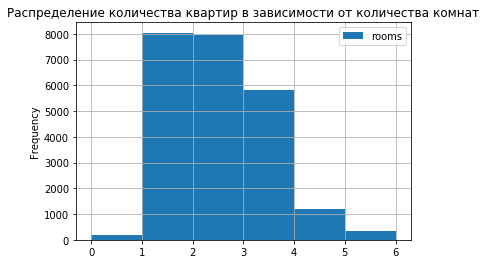

In [19]:
df['rooms'].plot(title='Распределение количества квартир в зависимости от количества комнат', 
                                          kind='hist', bins=6, legend=True, grid=True, range=(0, 6))

Отмечу, что распределение квартир в зависимости от количества комнат после удаления аномальных значений (да и до удаления тоже) похоже на распределение Пуассона.

<a href='#title'>К оглавлению.</a> 

<a id='2.2.2'></a> 
### Этап 2.2.2. Обработка аномалий в столбце "ceiling_height".

Теперь проанализируем поле ceiling_height. 

Напомню, что ранее удалось сформировать гипотезу о том, что значения от 3 до 5 включительно являются нормальными, а всё, что свыше 5 и меньше 3, кажется мусором и может быть удалено из набора данных. 

Напомню также, что в поле ceiling_height присутствуют пропущенные значения, поэтому для построения гистограммы выберем только те записи, в которых есть данные.

Посмотрим на распределение квартир в зависимости от высоты потолка.

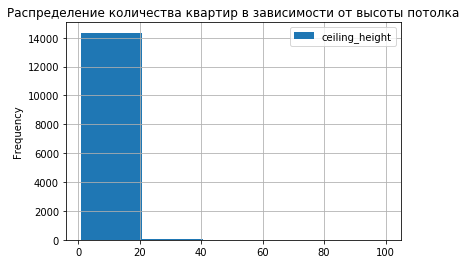

In [20]:
df.plot(title='Распределение количества квартир в зависимости от высоты потолка', 
                                          y='ceiling_height', kind='hist', bins=5, legend=True, grid=True)

Как и в прошлый раз, количество корзин было подобрано эмпирически. 

Видим, что основная часть квартир сконцентрирована в диапазоне высоты потолка от 1 до 20 метров, а всё, что выше 20 метров, сконцентрировано в крайне незначительном количестве. 

О каком-то распределении говорить пока сложно, так как основная масса квартир сконцентрирована в одной группе - от 0 до 20.

Посчитаем, сколько записей в поле ceiling_height приходится на аномальные значения.

In [21]:
print(df.query('ceiling_height <= 3')['ceiling_height'].count())
print(df.query('ceiling_height > 3 or ceiling_height <= 4')['ceiling_height'].count())
print(df.query('ceiling_height > 4 or ceiling_height <= 5')['ceiling_height'].count())
print(df.query('ceiling_height > 5')['ceiling_height'].count())

12934
14365
14365
35


Видим, что квартир, где высота потолка больше 5 метров, относительно немного, поэтому их можно безболезненно убрать. 

С другой стороны, квартиры, где высота потолка меньше 3 метров, формируют значительную часть набора данных, и их удаление пагубно скажется на всей дальшейшей работе. 

Поэтому удалим только те записи о квартирах, где высота потолка больше 5 метров. 

Также добавим isna(), чтобы в наборе данных после удаления лишнего остались пропущенные значения, которые обработаем  позднее.

In [22]:
df = df.query('ceiling_height <= 5 or ceiling_height.isna()')

Посмотрим, как изменилось распределение квартир в зависимости от высоты потолка.

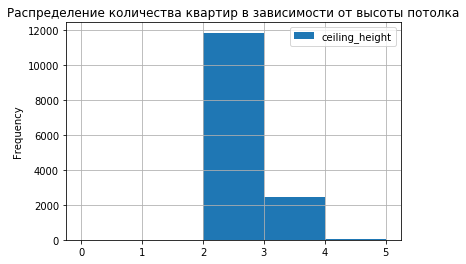

In [23]:
df.plot(title='Распределение количества квартир в зависимости от высоты потолка', 
                                          y='ceiling_height', kind='hist', bins=5, legend=True, grid=True, range=(0, 5))

Видим, что наиболее часто встречаются квартиры, где высота потолка лежит в диапазоне от где-то 2 до 3 метров. 

Для протокола отмечу, что пару раз я посмотрел на свой потолок и измерил его высоту в человеко-метрах, и мой потолок явно выше 3 метров, но данных, где высота потолка меньше 3 меров, много, и их удаление заставит наш DF изрядно похудеть. Поэтому делать этого мы не будем. Однако навязчивый вопрос о том, как же живут люди в квартире, где высота потока составляет 2 метра, никак не покидает меня. А Вас? 

Как бы там ни было, но пустить транспорт по маршруту "Санкт-Петербург - Средиземье" всё же советовал бы.

<a href='#title'>К оглавлению.</a> 

<a id='2.2.3'></a> 
### Этап 2.2.3. Обработка аномалий в столбце "balcony".

Следующее поле - balcony. Напомню, что в этом поле есть пропущенные значения, нулевые значения, а также аномальные значения в виде 3, 4 и 5.

Посмотрим, как распределены квартиры в зависимости от количества балконов.

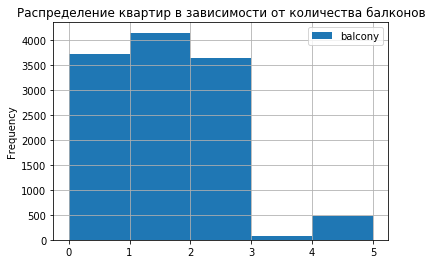

In [24]:
df.plot(y='balcony', title='Распределение квартир в зависимости от количества балконов', 
                                   kind='hist', grid=True, bins=5)

Видим, что преобладают квартиры с 1 и 2 балконами, а также без балконов. Квартиры с количеством балконов от 3 до 5 находится в хвосте, который благополучно можно отсечь.

Также добавим isna(), чтобы в наборе данных после удаления лишнего остались пропущенные значения, которые обработаем  позднее.

In [25]:
df = df.query('balcony <= 2 or balcony.isna()')

Посмотрим, как изменилось распределение квартир.

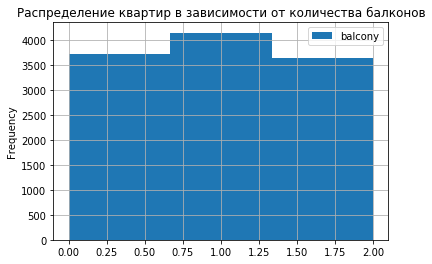

In [26]:
df.query('balcony.notnull()').plot(y='balcony', title='Распределение квартир в зависимости от количества балконов', 
                                   kind='hist', grid=True, bins=3, range=(0, 2))

Видим, что мы отсекли аномальный хвост, и теперь у нас есть записи только о тех квартирах, где есть 1 или 2 балкона, или же его нет вовсе.

Распределение квартир в зависимости от количества балконов похоже на нормальное.

<a href='#title'>К оглавлению.</a> 

<a id='2.3'></a> 
## Этап 2.3. Обработка дубликатов.

Теперь, когда с артефактами покончено, приступим к работе с дубликатами. Для начала посмотрим, сколько их у нас всего.

In [27]:
df.duplicated().sum()

0

Оказывается, у нас нет дубликатов. Кто бы мог подумать? Самое время занести шоколадку архитектору хранилища или инженеру данных, который готовил выгрузку. Блестящая работа.

Раз дубликатов нет, переходим к следующему этапу - обработка пропусков.

<a href='#title'>К оглавлению.</a> 

<a id='2.4'></a> 
## Этап 2.4. Обработка пропущенных значений.

Прежде чем начинать работу с пропусками в наборе данных, посмотрим на их общее количество.

In [28]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9017
floors_total               85
living_area              1855
floor                       0
is_apartment            20268
studio                      0
open_plan                   0
kitchen_area             2235
balcony                 11388
locality_name              48
airports_nearest         5408
cityCenters_nearest      5386
parks_around3000         5385
parks_nearest           15191
ponds_around3000         5385
ponds_nearest           14153
days_exposition          3010
dtype: int64

Наверное, всегда можно сказать "могло быть и хуже". Лучше тоже могло быть. Но нужно уметь радоваться мелочам.

<a id='2.4.1'></a> 
### Этап 2.4.1. Обработка пропущенных значений в полях "locality_name" и "floors_total".

Начнём с самого простого - полей locality_name и floors_total. Всего 48 и 85 пропусков соответственно. Чтобы не вносить ошибки в набор данных своими рассуждениями, их можно просто удалить без существенных потерь для набора данных.

In [29]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Проверяем, всё ли корректно сработало.

In [30]:
df[['locality_name', 'floors_total']].isna().sum()

locality_name    0
floors_total     0
dtype: int64

Отлично! Пропусков в поле locality_name и floors_total больше нет.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.2'></a> 
### Этап 2.4.2. Обработка пропущенных значений в полях "living_area" и "kitchen_area".

Объективно сложно предположить, почему в наборе данных отсутствуют данные в этих полях. Можно предположить, что данные не были внесены по вине случайности или рассеянности продавца квартиры. 

Гипотетически можно категоризировать стоимость квартиры по группам, найти для каждой группы медианное значения полей living_area и kitchen_area и заменить пропущенные значения этих полей на соответствующие медианные значения, однако доля пропущенных данных в этих полях составляет около 3% от общей величины набора данных, поэтому просто удалим их.

In [31]:
df.dropna(subset = ['living_area', 'kitchen_area'], inplace = True)

Проверяем.

In [32]:
df[['living_area', 'kitchen_area']].isna().sum()

living_area     0
kitchen_area    0
dtype: int64

Видим, что мы успешно избавились от проущенных значений в полях living_area и kitchen_area. Количество пропусков в остальных полях слишком велико, чтобы их просто удалить, поэтому и обработке пропущенных значений в этих полях попытаемся подойти более глубоко и более осмысленно.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.3'></a> 
### Этап 2.4.3. Обработка пропущенных значений в поле "is_apartment".

Рассмотрим поле is_apartment. Напомню, что это поле является булевым. То есть если квартира является апартаментами, в поле находится значение True, если квартира не является апартаментами - False.

Можно предположить, что раз это поле не заполнено, то квартира не является апартаментами, так как люди могут не вносить в объявление те особенности квартиры, которые этой квартире не присущи.

Следуюя этой логике, заменим все отсутствующие значения на False, что будет означать следующее: "если данные о принадлежности квартиры к классу апартаментов не были заполнены, эти квартиры априори не являются апартаментами".

Так как тип данных в поле is_apartment булевой, пропущенные значения можно заменять сразу на False.

In [33]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим факт заполнения пропущенных значений и тип данных в поле is_apartment после замены пропущенных значений.

In [34]:
df['is_apartment'].isna().sum()

0

In [35]:
df['is_apartment'].value_counts()

False    20162
True        26
Name: is_apartment, dtype: int64

Видим, что замена пропущенных значений осуществлена корректно: в поле is_apartment нет иных значений, кроме True и False, в том числе и пропущенных значений.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.4'></a> 
### Этап 2.4.4. Обработка пропущенных значений в поле "balcony".

Рассмотрим поле balcony. 

Пропущенные значения в этом поле будем заменять по той же логике, которую использовали при замене пропущенных значений в поле is_apartment: если информация в поле balcony отсутствует, значит, балкона в квартире нет, поэтому информация о нём в объявлении не была заполнена изначально.

In [36]:
df['balcony'] = df['balcony'].fillna(0)

Проверим, корректно ли осуществлена замена.

In [37]:
df['balcony'].isna().sum()

0

Видим, что пропуски в поле balcony были заменены успешно. 

Вместе с тем справедливо отметить, что такая замена изменила распределение квартир в зависимости от количества балконов в них. Проверим с помощью гистограммы.

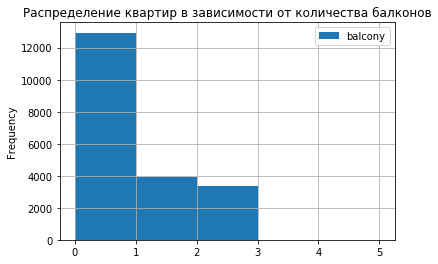

In [38]:
df.plot(y='balcony', title='Распределение квартир в зависимости от количества балконов', 
                                   kind='hist', grid=True, bins=5, range=(0, 5))

Видим значительное смещение распределения квартир в сторону тех квартир, у которых нет балконов, что неудивительно, ведь мы только что добавили в категорию "0" 9637 значений, которые ранее просто отсутствовали.

Распределение квартир в зависимости от количества балконов всё так же напоминает распределие Пуассона.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.5'></a> 
### Этап 2.4.5. Обработка пропущенных значений в поле "ceiling_height".

Рассмотрим поле ceiling_height. Учитывая тот факт, что ранее мы избавились от аномальных значений в этом поле, которые могли бы сместить показатели центра распределения выборки, пропущенные значения в этом поле заменим на медианное значение высоты потолка.

Отмечу, что более справедливой была бы логика замены пропущенных значений на медианное значение высоты потолка в зависимости от типа дома, в котором находится квартира (панелька, сталинка, хрущёвка и др.), однако такая информация отсутствует. 

Применительно к имеющемуся набору данных также имеет место гипотеза о связи высоты потолка и количества этажей, но мне кажется это малоправдоподобным на практике, поэтому такую гипотезу рассматривать не будем и остановися на медианном значении. 

In [39]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Проверяем.

In [40]:
df['ceiling_height'].isna().sum()

0

Видим, что пропуски в поле ceiling_height успешно обработаны. Посмотрим на распределение квартир в зависимости от высоты потолка после обработки пропущенных значений.

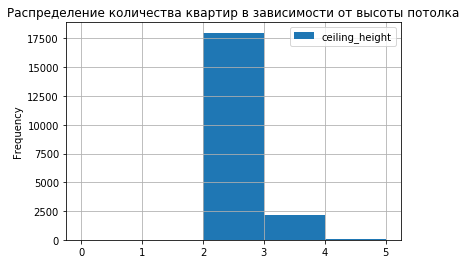

In [41]:
df.plot(title='Распределение количества квартир в зависимости от высоты потолка', 
                           y='ceiling_height', kind='hist', bins=5, legend=True, grid=True, range=(0, 5))

Видим, что распределение не изменилось, так как большая часть квартир в нашем наборе данных имеет высоту потолка, равную двум метрам. Такое же распределение мы видели на гистограмме и до обработки пропущенных значений.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.6'></a> 
### Этап 2.4.6. Обработка пропущенных значений в поле "days_exposition".

Рассмотрим поле days_exposition. Пропущенные значения в этом поле обработаем аналогично предыдущему полю: учитывая природу данных в этом поле - количество дней с момента публикации до снятия объявления - и отсутствие каких-либо признаков, которые могли бы привести к более объективной логике заполнения пропущенных значений (например, имея дату публикации объявления и дату снятия объявления с площадки, можно было бы более уверенно говорить о том, как лучше заполнить пропуски), заполним отсутствующие значения медианным значением количества дней с момента публикации до снятия объявления.

Перед обработкой пропущенных значений в этом поле проверим распределение квартир в зависимости от количества дней с даты подачи объявления и до его снятия.

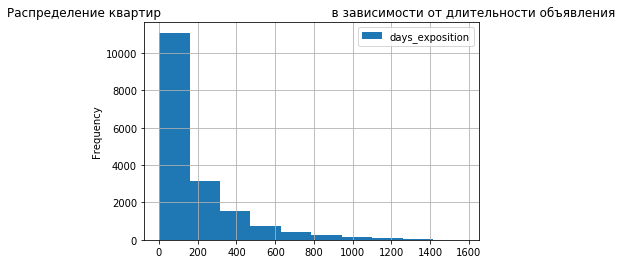

In [42]:
df.plot(y='days_exposition', title='Распределение квартир \
                                    в зависимости от длительности объявления', kind='hist', grid=True, bins=10)

Распределение квартир похоже на распределение Пуассона. 

Видим, что основная масса квартир в зависимости от длительности объявления ссоредоточена в диапазоне от 0 до 900. После 900 начинается длинный хвост с, по всей видимости, не очень интересными объявлениями, авторы которых долго не теряли надежду. 

Вместе с тем такое тоже имеет место быть и может быть объяснено отсутствием спроса на жильё такого типа или с такими условиями,  которые были указаны в объявлении, а, может, не устроила цена, поэтому объявление было активным очень долго.

В силу этого отсекать длинный хвост мы не будем.

Вместо этого проанализируем влияние этого хвоста на показатели центра распределения, посчитав среднее и медианное значение дней и сравнив его между собой.

In [43]:
print(df['days_exposition'].mean())
print(df['days_exposition'].median())

184.76893114904342
101.0


Видим, что средняя и медианная длительность объявления отличается на примерно 84 дня, что может быть связано как раз с наличием длинного хвоста с малым количеством объявлений, которые очень долго были активы на платформе. 

Поэтому для обработки пропущенных значений будем использовать медианное значение, чтобы нивелировать влияние этого хвоста.

In [44]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

Посмотрим, как изменилось распределение квартир в зависимости от длительности объявления после обработки пропущенных значений. Условие о ненулевых значениях уже можно не применять, так как такие значения были заменены на медианное значение длительности объявления.

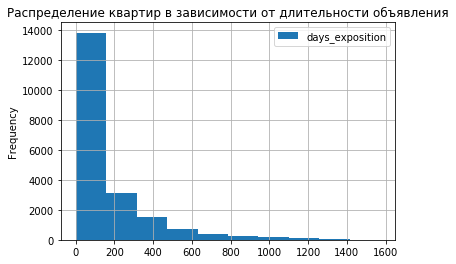

In [45]:
df.plot(y='days_exposition', title='Распределение квартир в зависимости от длительности объявления', kind='hist',
       grid=True, bins=10)

Видим, что после обработки пропущенных значений, которые мы заменили на медианную длительность объявления, распределение квартир не изменилось.

In [46]:
df['days_exposition'].isna().sum()

0

Оставшиеся поля можно объединить в две большие группы: поля, которые описывают расстрояние от дома, в котором находится квартира, до какого-либо объекта и количество каких-либо объектов на расстроянии 3 км от дома, в котором находится квартира.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.7'></a> 
### Этап 2.4.7. Обработка пропущенных значений в полях "airports_nearest", "cityCenters_nearest", "parks_nearest" и "ponds_nearest".

Для обработи пропущенных значений в этих полях изначально предполагалось применить следующую логику:

1. Формируем промежуточные наборы данных, в каждом из которых оставим поле locality_name и каждое из исследуемых полей, в которых будем обрабатывать пропуски.

2. В промежуточном наборе данных оценим медианное расстрояние до объета в зависимости от населённого пункта.

3. Заменим пропущенные значения в изначальном наборе данных на медианное расстрояние до объекта в зависимости от населённого пункта.

В ходе эксперминета выяснилось, что такая логика не сработает: в теории, чтобы описанная цепочка действий сработала, нужно, чтобы для каждого уникального населённого пункта были описаны эти расстрояния. 

На практике оказалось, что в наборе данных есть населённые пункты, для которых не указано расстояние ни до одного из объектов.

In [47]:
print('Количество уникальных населённых пунктов:', df['locality_name'].nunique())

Количество уникальных населённых пунктов: 342


In [48]:
print('Количество уникальных населённых пунктов, для которых известно расстояние до аэропорта:', 
      df[df['airports_nearest'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно расстояние до аэропорта: 24


In [49]:
print('Количество уникальных населённых пунктов, для которых известно расстояние до центра города:', 
      df[df['cityCenters_nearest'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно расстояние до центра города: 24


In [50]:
print('Количество уникальных населённых пунктов, для которых известно расстояние до парка:', 
      df[df['parks_nearest'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно расстояние до парка: 12


In [51]:
print('Количество уникальных населённых пунктов, для которых известно расстояние до бассейна:', 
      df[df['ponds_nearest'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно расстояние до бассейна: 17


Таким образом можно сделать вывод о том, что в изначальном наборе данных до применения фильтра имеем 342 уникальных населённых пункта, в которых находятся квартиры. 

Чтобы реализовать описанную логику работы с пропусками в исследуемых полях, необходимо рассчитать мединное значения расстрояния от квартиры до объектов для каждого уникального населённого пункта. При этом если даже для одного населённого пункта в поле с расстоянием не будет данных, описанная логика работать не будет.

Изучив количество населённых пунктов в зависимости от расстояния до каждого объекта при условии, что поле с расстоянием не имеет пропущенных значений, приходим к выводу, что для поля airports_nearest можем рассчитать медианное расстояние только для 24 населённых пунктов, для поля cityCenters_nearest - для 24 населённых пунктов, для поля parks_nearest - для 12 населённых пунктов, для поля ponds_nearest - для 17 населённых пунктов. 

Для остальных населённых пунктов для этих полей медианное расстрояние рассчитать невозможно, так как есть населённые пункты, для которых расстояние до объекта не указано.

Следовательно, какого-то объективного способа заполнить пропущенные значения в этих полях нет. В таком случае условимся, что пропущенные значения в этих полях мы заменим на 0 типа float, а для себя обозначим, что если в поле с расстоянием указано 0, то квартира находится недалеко от объекта.

In [52]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

Проверим, корректно ли осуществлена замена.

In [53]:
df[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']].isna().sum()

airports_nearest       0
cityCenters_nearest    0
parks_nearest          0
ponds_nearest          0
dtype: int64

In [54]:
df[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20188 entries, 0 to 23698
Data columns (total 4 columns):
airports_nearest       20188 non-null float64
cityCenters_nearest    20188 non-null float64
parks_nearest          20188 non-null float64
ponds_nearest          20188 non-null float64
dtypes: float64(4)
memory usage: 788.6 KB


Видим, что замена осуществлена корректно, при этом тип данных в этих полях после обработки пропущенных значений - float.

<a href='#title'>К оглавлению.</a> 

<a id='2.4.8'></a> 
### Этап 2.4.8. Обработка пропущенных значений в полях "parks_around3000" и "ponds_around3000".

Оставшиеся два поля - parks_around3000 и ponds_around3000 - описывают количество парков и бассейнов в радиусе 3 км от квартиры. Так как это поле очевидно связано с населённым пунктом, попытаемся применить описанную выше логику, которую возможно было бы применить для группы полей, в которой описывалось растояние от квартиры до объекта.

Напомню, что в наборе данных содержится 342 населённых пункта.

In [55]:
print('Количество уникальных населённых пунктов, для которых известно количество парков в радиусе 3000 м.:', 
      df[df['parks_around3000'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно количество парков в радиусе 3000 м.: 24


In [56]:
print('Количество уникальных населённых пунктов, для которых известно количество бассейнов в радиусе 3000 м.:', 
      df[df['ponds_around3000'].notnull()]['locality_name'].nunique())

Количество уникальных населённых пунктов, для которых известно количество бассейнов в радиусе 3000 м.: 24


Видим, что только для 24 населённых пунктах из 342 мы можем определить медианное количество объектов в радиусе 3 км. Поэтому осуществим замену пропущенных значений в этих полях на медианные значения количества объектов в радиусе 3 км, расссчитанных на всём наботе данных.

In [57]:
df['parks_around3000'].median()

0.0

In [58]:
df['ponds_around3000'].median()

0.0

Медианное количество объектов, равное нулю для обоих случаев, несколько настораживает, поэтому построим гистограмму распределения квартир в зависимости от количества каждого объекта.

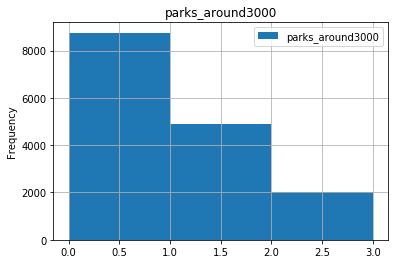

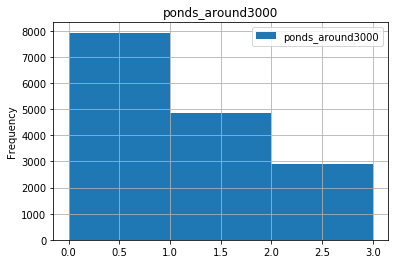

In [59]:
for col in df[['parks_around3000', 'ponds_around3000']]:
    df.plot(y=col, title=col, kind='hist', grid=True, bins=3)

Видим, что распределение квартир в зависимости от количества объектов в радиусе 3 км. не отличается от объекта к объекту, при этом основная доля квартир сконцентрирована в корзине с квартирами, у которых нет ни одного объекта в радиусе 3 км.

Следовательно, пропущенные значения в полях parks_around3000 и ponds_around3000 можно заменять на медианное количество таких объектов.

In [60]:
df['parks_around3000'] = df['parks_around3000'].fillna(df['parks_around3000'].median())
df['ponds_around3000'] = df['ponds_around3000'].fillna(df['ponds_around3000'].median())

Проверим, корректно ли осуществлена замена и изменилось ли распределение квартир в зависимости от количества объектов в радиусе 3 км.

In [61]:
df[['parks_around3000', 'ponds_around3000']].isna().sum()

parks_around3000    0
ponds_around3000    0
dtype: int64

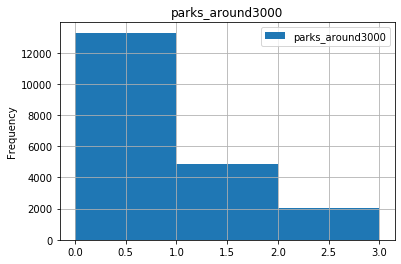

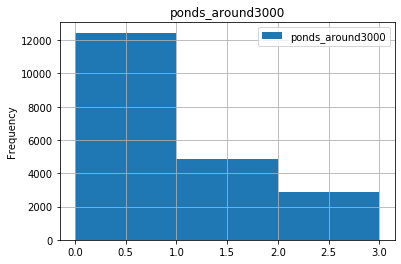

In [62]:
for col in df[['parks_around3000', 'ponds_around3000']]:
    df.plot(y=col, title=col, kind='hist', grid=True, bins=3)

Видим, что пропущенные значения были успешно заменены медианными, а закономерность в распределении примерно сохранилась, с той лишь разницей, что теперь в наборе данных больше значений в корзине, в которой у квартир в 3 км нет ни бассейна, ни парка.

Так как обработка пропущенных значений завершена, можем выполнить преобразование указанных полей, о котором говорили ранее.

In [63]:
df[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']] = df[['floors_total', 'balcony', 'parks_around3000', 
'ponds_around3000', 'days_exposition']].astype('int')

In [64]:
df[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']] = \
(df[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']] / 1000).astype('int')

<a href='#title'>К оглавлению.</a> 

# Вывод по этапу 2.

На данном этапе мы занимались предварительной обработкой данных.

Напомню, что для обработки данных условились принять следующую последовательность действий:

1. Преобразование типов данных.

2. Работа с аномалиями.

3. Работа с дубликатами.

4. Работа с пропущенными значениями.

**В ходе преобразования типов данных были совершены следующие преобразования:**

1. Данные поля last_price были переведы из рублей в миллионы рублей.


2. Данные поля first_day_exposition были преобразованы из str в datetime.


3. Данные полей floors_total, balcony, parks_around3000, ponds_around3000, days_exposition преобразованы из float в int.


4. Данные полей airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest переведены из метров в километры с округлением до целого значения.

**В ходе работы с артефактами были идентифицированы и обработаны аномалии в следующих полях:** 

1. rooms: проблема - аномально высокое количество комнат в квартире, порою превышающее 10 единиц, решение - удаление из набора данных записей о квартирах, у которых более 5 комнат.


2. ceiling_height: проблема - аномально высокое значение высоты потолка, превышающее порою 5 метров, решение - удаление из набора данных записей о квартирах, у которых высота потолка превышает 5 метров.


3. balcony: проблема - аномально высокое количество балконов, равное 3, 4 или 5 единицам, решение - удаление из набора данных записей о квартирах, у которых количество балконов превышает 2.

**Дубликаты в наборе данных обнаружены не были.**

**В ходе работы с пропущенными значениями были идентифицированы и обработаны пропуски в следующих полях:**

1. Поля locality_name и floors_total, логика обработки пропусков - удаление из набора данных записей о квартирах, для которых значения полей locality_name и floors_total пропущены ввиду их незначительного количества в масштабах набора данных.


2. Поля living_area и kitchen_area, логика обработки пропусков - удаление из набора данных записей о квартирах, для которых значения полей living_area и kitchen_area пропущены ввиду их незначительного количества в масштабах набора данных.


3. Поле is_apartment, логика обработки пропусков - замена пропущенных значений на False, исходя из допущения, что если данные о принадлежности квартиры к классу апартаментов не были заполнены, эти квартиры априори не являются апартаментами.


4. Поле balcony, логика обработки пропусков - замена пропущенных значений на 0, исходя из допущения, что если информация в поле balcony отсутствует, значит, балкона в квартире нет, поэтому информация о нём в объявлении не была заполнена изначально.


5. Поле ceiling_height, логика обработки пропусков - замена пропущенных значений на медианную высоту полотков, рассчитанную на всём наборе данных, исходя из допущения, что для более практичной логики обработки пропущенных значений в этом поле набора данных не содержит необходимых данных.


6. Поле days_exposition, логика обработки пропусков - замена пропущенных значений на медианное количество дней с момента публикации до снятия объявления, рассчитанное на всём наборе данных, исходя из допущения, что для более практичной логики обработки пропущенных значений в этом поле набора данных не содержит необходимых данных.


7. Поля airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest, логика обработки пропусков - замена пропущенных значений на 0 ввиду того, что предложенный способ обработки пропущенных значений нереализуем на данных имеющегося набора данных.


8. Поля parks_around3000 и ponds_around3000, логика обработки пропусков - замена пропущенных значений на 0 ввиду того, что предложенный способ обработки пропущенных значений нереализуем на данных имеющегося набора данных.

<a href='#title'>К оглавлению.</a> 

# Этап 3. Добавление новых признаков.

На данном этапе добавим в набор данных новые признаки.

<a id='3.1'></a> 
## Этап 3.1. Новый признак "Цена квадратного метра".

Добавим в набор данных поле price_per_square_meter, используя следующую логику расчёта: значение поля last_price (стоимость квартиры на момент снятия объявления) делим на значение поля total_area (суммарная площадь квартиры в кв.м.), получая стоимость одного кв.м. квартиры на момент снятия объявления. Отмечу, что в данном поле цена за 1 кв.м. квартиры будет укзана в миллионах рублей с округлением до 2 знаков после запятой.

In [65]:
df['price_per_square_meter'] = round(df['last_price'] / df['total_area'], 2)

Проверим, произошёл ли расчёт нового показателя.

In [66]:
df[['total_area', 'last_price', 'price_per_square_meter']].head(10)

,total_area,last_price,price_per_square_meter
0,108.00,13.00,0.12
1,40.40,3.35,0.08
2,56.00,5.20,0.09
4,100.00,10.00,0.10
5,30.40,2.89,0.10
6,37.30,3.70,0.10
8,33.16,2.90,0.09
9,61.00,5.40,0.09
10,39.60,5.05,0.13
11,44.00,3.30,0.08


Видим, что в наборе данных появилось поле price_per_square_meter. Следовательно, расчёт показателя осуществлён.

<a href='#title'>К оглавлению.</a> 

<a id='3.2'></a> 
## Этап 3.2. Новые признаки "День недели, месяц и год публикации объявления".

За основу для расчёта необходимых показателей будем использовать поле first_day_exposition, извлекая из него соответственно день, месяц и год, помещая эти значения в новые поля набора данных.

In [67]:
df['day_exposition'] = df['first_day_exposition'].dt.day
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Проверим, произошёл ли расчёт новых показателей.

In [68]:
df[['first_day_exposition', 'day_exposition', 'month_exposition', 'year_exposition']].head(5)

,first_day_exposition,day_exposition,month_exposition,year_exposition
0,2019-03-07,7,3,2019
1,2018-12-04,4,12,2018
2,2015-08-20,20,8,2015
4,2018-06-19,19,6,2018
5,2018-09-10,10,9,2018


Видим, что в наборе данных появились поля day_exposition, month_exposition и year_exposition. Следовательно, расчёт показателей осуществлён, визуально подтверждается корректность расчёта.

<a href='#title'>К оглавлению.</a> 

<a id='3.3'></a> 
## Этап 3.3. Новый признак "Этаж квартиры".

Для расчёта этого показателя понадобятся знчения из двух полей: значения поля floor описывает этаж, на котором находится квартира, значения поля floors_total описывает общее количество этажей в доме.

Для расчёта показателя напишем функцию, которая будет работать по следующей логике:

1. Если значение поля floor совпадает со значением поля floor_total, функция вернёт значение "последний".

2. Если поле flor равно 1, функция вернёт значение "первый".

3. Если поле flor равно 1, при этом поле flor_total также равно 1, функция возвращает значение "один этаж" (немного не по условию, но мне кажется, это логичнее, чем говорить о том, что этаж первый или последний).

4. В остальных случаях функция вернёт значение "другой".

На вход функция принимает строку, из которой извлекает необходимые поля.

In [69]:
def floor_apartment(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        if floor == 1 and floors_total == 1:
            return 'Один этаж'
        else:
            return 'Последний'
    elif floor == 1:
        return 'Первый'
    else:
        return 'Другой'

Проверим работу функции. Для этого создадим несколько строк.

In [71]:
row_values_1 = [5, 5]
row_values_2 = [1, 5]
row_values_3 = [2, 4]
row_values_4 = [1, 1]
row_values_5 = [3, 8]
row_columns = ['floor', 'floors_total']
row_1 = pd.Series(data = row_values_1, index = row_columns)
row_2 = pd.Series(data = row_values_2, index = row_columns)
row_3 = pd.Series(data = row_values_3, index = row_columns)
row_4 = pd.Series(data = row_values_4, index = row_columns)
row_5 = pd.Series(data = row_values_5, index = row_columns)
print(floor_apartment(row_1))
print(floor_apartment(row_2))
print(floor_apartment(row_3))
print(floor_apartment(row_4))
print(floor_apartment(row_5))

Последний
Первый
Другой
Один этаж
Другой


Видим, что функция работает корректно на тестовых данных. Реализуем расчёт показателя на данных из набора данных.

In [72]:
df['floor_apartment'] = df.apply(floor_apartment, axis = 1)

Проверим, корректно ли работает функция на данных из набора данных. Для этого выведем новое поле, а также поля, участвовавшие в расчёте нового поля, и визуально оценим корректность работы функции.

In [73]:
df[['floor', 'floors_total', 'floor_apartment']].head(20)

,floor,floors_total,floor_apartment
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
4,13,14,Другой
5,5,12,Другой
6,6,26,Другой
8,26,27,Другой
9,7,9,Другой
10,3,12,Другой
11,4,5,Другой


Видим, что функция корректно работает на данных из набора данных, что также подтверждается визуальным анализом результата работы функции.

In [74]:
df['floor_apartment'].value_counts()

Другой       14798
Последний     2873
Первый        2498
Один этаж       19
Name: floor_apartment, dtype: int64

<a href='#title'>К оглавлению.</a> 

<a id='3.4'></a> 
## Этап 3.4. Новые признаки "Соотношение жилой и общей площади" и "Соотношение площади кухни и общей площади".

Для реализации показателей создаём 2 новых поля в наборе данных, куда помещаем соотношение жилой и общей площади, а также соотношение площади кухни и общей площади. При этом значение новых показателей округлим до 2 знаков после запятой.

In [75]:
df['living_area_to_total_area'] = round((df['living_area'] / df['total_area']), 2)
df['kitchen_area_to_total_area'] = round((df['kitchen_area'] / df['total_area']), 2)

Проверим, корректно ли рассчитались значения показателей.

In [76]:
df[['living_area', 'total_area', 'living_area_to_total_area', 'kitchen_area', 'total_area', 
'kitchen_area_to_total_area', ]].head()

,living_area,total_area,living_area_to_total_area,kitchen_area,total_area,kitchen_area_to_total_area
0,51.0,108.0,0.47,25.0,108.0,0.23
1,18.6,40.4,0.46,11.0,40.4,0.27
2,34.3,56.0,0.61,8.3,56.0,0.15
4,32.0,100.0,0.32,41.0,100.0,0.41
5,14.4,30.4,0.47,9.1,30.4,0.30


Визуально угадывается корректность рассчитанных показателей, которая была подтверждена ручным пересчётом показателей на калькуляторе.

<a href='#title'>К оглавлению.</a> 

# Вывод по этапу 3.

На данном этапе происходил расчёт новых показателей с их добавлением в набор данных. Были рассчитаны и добавлены следующие показатели:

1. Цена квадратного метра.

2. День недели публикации объявления.

3. Месяц публикации объявления.

4. Год публикации объявления.

5. Этаж квартиры.

6. Соотношение жилой и общей площади.

7. Соотношение площади кухни и общей площади.

Цена квадратного метра была рассчитана как отношение общей площади к квартире к стоимости квартиры на момент снятия объявления.

День недели, месяц и год публикации объявления были извлечены из поля first_day_exposition с помощью метода dt с передачей ему нужного параметра.

Для расчёта этажа квартиры была реализована функция, выполняющая следующие действия:

- если значение поля floor совпадает со значением поля floor_total, функция вернёт значение "последний";

- если поле flor равно 1, функция вернёт значение "первый";

- если поле flor равно 1, при этом поле flor_total также равно 1, функция возвращает значение "один этаж" (немного не по условию, но мне кажется, это логичнее, чем говорить о том, что этаж первый или последний);

- в остальных случаях функция вернёт значение "другой".

Соотношение жилой и общей площади, а также соотношение площади кухни и общей площади были рассчитаны по логике, недвусмысленно указанной в названии этих показателей.

<a href='#title'>К оглавлению.</a> 

# Этап 4. Исследовательский анализ данных.

На данном этапе требуется провести исследовательский анализ данных по заданным проектом направлениям. 

<a id='4.1'></a> 
## Этап 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков.

Так как в условии явно не сказано, о какой площади идёт речь, изучим все показатели прощади: total_area, kitchen_area и living_area.

Для начала изучим общие описательные статистики по этим полям.

In [77]:
round((df[['total_area', 'kitchen_area', 'living_area', 'last_price', 'rooms', 'ceiling_height']].describe()), 2)

,total_area,kitchen_area,living_area,last_price,rooms,ceiling_height
count,20188.00,20188.00,20188.00,20188.00,20188.00,20188.00
mean,58.50,10.34,33.35,6.15,2.04,2.69
std,28.64,5.52,18.34,7.46,0.95,0.21
min,14.00,1.30,2.00,0.01,1.00,1.00
25%,40.00,7.00,18.60,3.47,1.00,2.60
50%,51.40,9.00,30.00,4.60,2.00,2.65
75%,68.00,11.70,42.00,6.60,3.00,2.70
max,507.00,100.70,301.50,330.00,5.00,4.90


Видим, что количество записей в полях одинаковое, чего и следовало ожидать, ведь мы провели большую работу по устранению атрефактов и обработке пропущенных значений. Также имеем набор статистических метрик для каждого из полей, смысл которых недвусмысленно проистекает из их названия, поэтому подробно останавливаться на них не будем.

Посмотрим, как распределены значения этих полей.

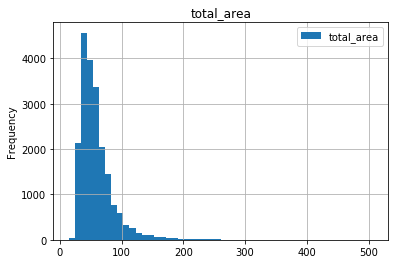

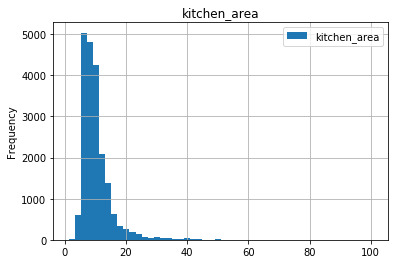

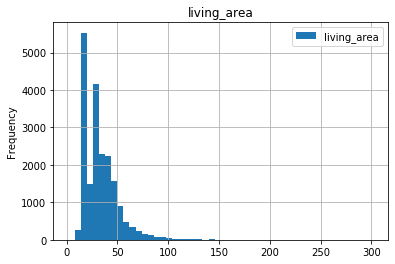

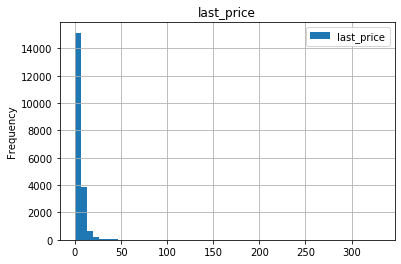

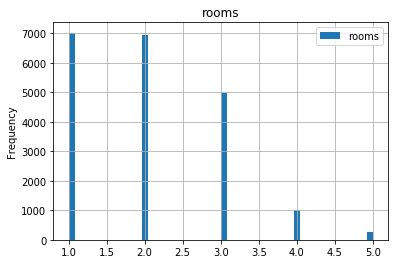

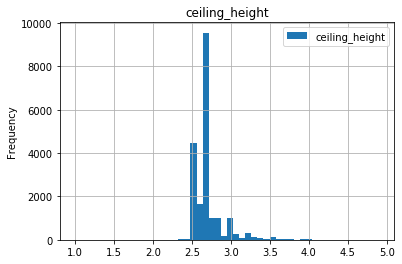

In [78]:
for col in df[['total_area', 'kitchen_area', 'living_area', 'last_price', 'rooms', 'ceiling_height']]:
    df.plot(y=col, title=col, kind='hist', grid=True, bins=50)

В основном все значения исследуемых полей, кроме условно-категориального поля room, сосредоточены в левой части гистограммы с длинным низким хвостом высоких значений в правой части гистограммы. Распределение в этих полях напоминает распределение Пуассона.

Из гистограмм можно заключить, что в основной массе преобладают объявления с квартирами, если позволите, "средней руки": для них характерна общая площадь до 100 кв.м., площадь кухни - где-то до 15-16 кв.м. жилая площадь - где-то до 50 кв.м. Наиболее частая цена на такие квартиры лежит в диапазоне до 20-25 млн. руб., а высота потолка в таких квартирах - от 2.5 до 3 м. Чаще всего встречаются квартиры с количеством комнат от 1 до 3, реже встречаются четырёхкомнатные квартиры, а квартиры с пятью комнатами можно по пальцам руки посчитать.

<a href='#title'>К оглавлению.</a> 

<a id='4.2'></a> 
## Этап 4.2. Задание "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

Для выполнения задания изучим поле days_exposition. Напомню, что в нём описана информация о том, сколько дней было размещено объявление (от публикации до снятия).

Посмотрим на описательную статистику для этого поля.

In [79]:
round((df[['days_exposition']].describe()), 2)

,days_exposition
count,20188.00
mean,173.44
std,207.98
min,1.00
25%,48.00
50%,101.00
75%,204.00
max,1572.00


Видим, что в поле находится 20188 записей,  в среднем каждое объявление находится на платформе 173 дня, при этом для поля характерна высокое стандартное отклонение, что говорит о большом отклонении длительности нахождения объявлений на платформе некоторых объявлений от средней длительности. 

Наиболее удачными можно считать объявления, которые были размещены на платформе всего лишь 1 день. Хорошая, видимо, квартира. Напротив, наименее привлекательное объявление находилось на платформе 1572 дня, а это, на минутку, 4 года и ещё треть пятого. Видимо, владелец никогда не сдаётся, что не может не радовать, но и предмет объявления тоже нужно оценивать адекватно.

Медианная длительность нахождения объявления на платформе - 101 день. Это значение делит нашу выборку на "до 101 дня" и "после 101 дня" нахождения объявления на платформе.

Четверть объявлений из выборки находились на платформе не более 48 дней (1 квартиль), 3/4 объявлений из выборки находились на платформе не более 204 дней.

Построим гистограмму распределения объявлений в зависимости от количества дней их нахождения на плафторме.

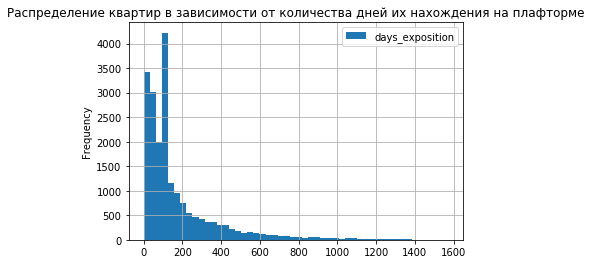

In [80]:
df.plot(y='days_exposition', title='Распределение квартир в зависимости от количества дней их нахождения на плафторме', 
       kind='hist', grid=True, bins=50)

Объявления по признаку количества дней нахождения на платформе имеют распределение Пуассона: видим скполение основной массы объявлений в левой части гисторграммы и длинный хвост в правой части гистограммы, описывающий распределение тех квартир, объявления о которых находились на платформе очень долго.

В ответе на вопрос, какой срок нахождения объявления на платформе считать хорошим, а какой - плохим, может помочь ящик с усами.

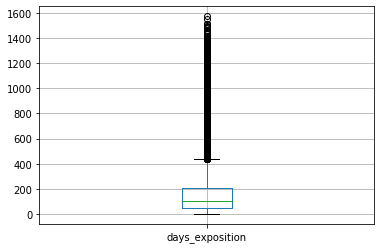

In [81]:
df.boxplot(column='days_exposition')

Мало что понятно: видим большое количество выборосов, которые сливаются в единую жирную линию. 

Чтобы привести ящик с усами к более удобному для восприятия виду, ограничим диапазон значений по оси Y. 

Минимальное значение установим на уровне 0, так как у нас нет объявлений с отрицательным количеством дней нахождения на платформе, а вот с верхней границей поэкспериментируем для подбора лучшего параметра.

(0, 500)

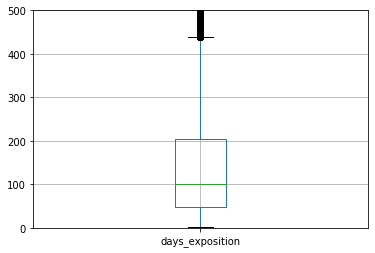

In [82]:
import matplotlib.pyplot as plt
df.boxplot(column='days_exposition')
plt.ylim(0, 500)

Выглядит приятнее, не правда ли?

Таким образом, в ответе на вопрос о том, при какой длительности нахождения объявления на плафторме можно считать, что продажа прошла быстро, а при какой длительности можно говорить о медленной продаже, ящик с усами нам подсказывает:

1. Если объявление находится на платформе не более 48 дней, квартира продаётся очень быстро. Блиц - скорость без границ!


2. Если объявление находится на платформе не более 101 дня, можно говорить о том, что квартира продаётся не очень быстро, но всё ещё нормально без аномально высоких сроков.


3. Если объявление находится на платформе не более 204 дней, можно говорить о том, что квартира продаётся медленно, но не аномально медленно. 


4. Количество нахождения объявления на платформе не более около 420 дней говорит о том, что квартира продаётся очень медленно, но пока что клиент ещё не входит в зону аномальных объявлений с аномально большим количеством дней находления их на платформе. Вместе с тем практика, когда квартира продатёся ~1 год, кажется нормальной, если переносить этот вывод на реальный рынок недвижимости.


5. Если объявление находится на платформе более 420 дней, оно сваливается в категорию аномальных, а рассчитывать на его продажу в принципе не приходится.

<a href='#title'>К оглавлению.</a> 

<a id='4.3'></a> 
## Этап 4.3. Задание "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили"

Это задание было выполнено в рамках шага 2.1., когда мы работали с артефактами, в том числе было приведено описание логики, по которой происходила обработка таких значений, а также предположения о их пририоде и адекватности.

В рамках данного шага построим ящики с усами для тех же полей, в которых были идентифицированы аномальные значения. Напомню, что это поля rooms, ceiling_height и balcony.

Предварительно аномальные значения в этих полях мы уже обработали. Проверим, как распределяются значения этих полей в ящике с усами.

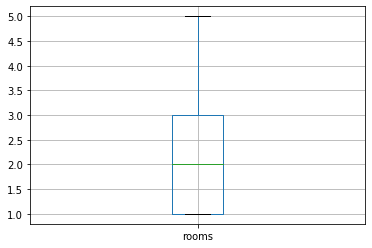

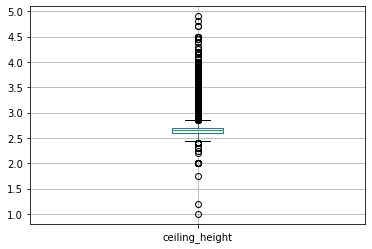

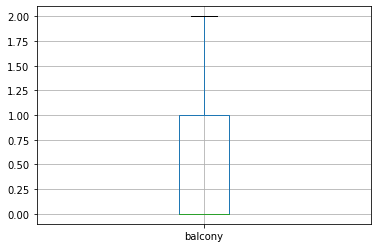

In [83]:
for col in df[['rooms', 'ceiling_height', 'balcony']]:
    df.boxplot(column=col)
    plt.show()

Видим, что мы довольно успешно обработали артефакты в полях balcony и rooms, так как в них нет выбросов. 

А вот с полем ceiling_height всё не так однозначно, так как оно изобилует выбросами. Рассмотрим его более подробно, при этом изменим масштаб графика, чтобы лучше воспринимать информацию

(1, 3.5)

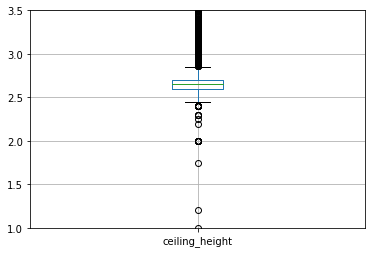

In [84]:
df.boxplot(column='ceiling_height')
plt.ylim(1, 3.5)

Выбросами в данном поле считается высота потолка меньшая, чем 2,4 метра, и большая, чем 2.8 метров. Об аномальности значений этого поля мы уже говорили ранее: потолки высотой до 3 метров не очень лаконично вписываются в картину мира среднестатистического человека, однако квартир с такой высотой потолка большинство, и удалять их из набора данных не следует, так как набор данных потеряет в информативности.

О наличии выбросов в других полях однозначно сказать сложно: к примеру, большое значения поля total_area, kitchen_area или living_area вполне может иметь место быть, так как на платформе могут быть размещены объявления о продаже очень больших квартир. Отсюда проистекает наличие в наборе данных объявлений с условно-аномальной стоимостью: чем больше количество кв.м., тем выше стоимость квартиры. Поэтому и в поле last_price однозначно определить выбросы - задача проблематичная. 

В целом, как мне кажется, выбивающиеся и аномальные значения в наборе данных уже были отсечены на этапе работы с артефактами, а дальнейшие сокращения данных в рамках имеющегося набора данных представляются маловозможными и, возможно, нецелесообразными в рамках этого проекта.

<a href='#title'>К оглавлению.</a> 

<a id='4.4'></a> 
## Этап 4.4. Задание "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года"

Для изучения зависимости обратимся к коэффициенту корреляции, который покажет тесноту линейной зависимости между полями.

Также отмечу, что для оценки зависимости стоимости квартиры от категории этажа нам нужно перевести эти категории (которые сейчас у нас с типом данных str) в индексы с типом данных int.

Для этого реализуем соответствующую функцию.

In [85]:
def floor_apartment_index(floor_apartment):
    if floor_apartment == 'Первый':
        return 1
    elif floor_apartment == "Последний":
        return 2
    elif floor_apartment == 'Один этаж':
        return 3
    elif floor_apartment == 'Другой':
        return 4

Проверим работу функции на тестовых данных.

In [86]:
print(floor_apartment_index('Первый'))
print(floor_apartment_index('Последний'))
print(floor_apartment_index('Один этаж'))
print(floor_apartment_index('Другой'))

1
2
3
4


Функция корректно работает на тестовых данных. Применим функцию к набору данных, результаты работы функции поместим в поле floor_apartment_index.

In [87]:
df['floor_apartment_index'] = df['floor_apartment'].apply(floor_apartment_index)

Проверим работу функции.

In [88]:
df[['floor_apartment', 'floor_apartment_index']].head(10)

,floor_apartment,floor_apartment_index
0,Другой,4
1,Первый,1
2,Другой,4
4,Другой,4
5,Другой,4
6,Другой,4
8,Другой,4
9,Другой,4
10,Другой,4
11,Другой,4


Видим, что функция работает корректно. Теперь можно оценивать коэффициент корреляции. Напомню, что по условию задачи необходимо оценивать объявления о тех квартирах, которые находятся либо на первом, либо на последнем этаже. Для выполнения этого условия сделаем срез данных.

In [89]:
round((df[['last_price', 'total_area', 'rooms', 'floor_apartment_index', 'cityCenters_nearest']].query('floor_apartment_index == \
1 or floor_apartment_index == 2').corr().head(1)), 2)

,last_price,total_area,rooms,floor_apartment_index,cityCenters_nearest
last_price,1.0,0.66,0.34,0.1,-0.01


Так как значения коэффициента корреляции между изучаемыми признаками, кроме признака cityCenters_nearest, всегда больше нуля, можно говорить о том, что линейная зависимость - какой бы сильной она ни была - имеет прямую направленность, т.е. по мере росто какого-либо из признаков будет расти и цена квартиры. В случае с признаком cityCenters_nearest имеет место обратная зависимость, т.е. по мере приближения квартиры к центру стоимость...падает? Но об этом позже.

В своей практике я применяю следующую систему критериев оценки силы линейной зависимости:

- линейная зависимость сильная, если значение коэффициента корреляции лежит в пределах от ±0.70 до ±1.00;

- линейная зависимость средняя, если значение коэффициента корреляции лежит в пределах от ±0.30 до 0.69;

- линейная зависимость слабая, если значение коэффициента корреляции лежит в пределах от 0.00 до 0.29.

Полученные нами значения коэффициента корреляции предлагаю интерпретировать таким же образом.

Так, зависимость между:

- ценой квартиры и площадью квартиры - средняя прямая; 

- ценой квартиры и количеством комнат - средняя прямая; 

- ценой квартиры и индексом этажности - низкая прямая;

- ценой квартиры и удалённостью от центра - низкая обратная.

Отмечу также, что коэффициент корреляции не позволяет доподлинно утверждать о наличии или отсутствии зависимости между изучаемыми показателями, а лишь показывает наличие или отсутствие связи между показателями, а также тесноту этой связи, в рамках изучаемой выборки.

Так, коэффициент корреляции указал на среднюю зависимость между ценой квартиры и её площадью. Действительно, на практике принято указывать стоимть квартиры, которая в свою очередь складывается стоимости 1 кв.м. в этой квартире, умноженной на количество кв.м. в квартире. Поэтому коэффициент корреляции подтверждает гипотезу о том, что стоимость квартиры зависит от площади квартиры.

Коэффициент корреляции также указывает на наличие средней зависимости между ценой квартиры и количеством комнат, однако несмотря на то, что оба поля - площадь и количество комнат - попали в категорию "средняя зависимость", зависимость между ценой и количеством комнат куда ниже, чем между ценой и площадью. На практике количество комнат играет не самую значимую роль при ценообразовании, так как количество комнат зависит от ряда других факторов, таких как планировка, тип дома, год его постройки и др. Поэтому всё же большее влияние на цену квартиры оказывает именно её площадь. Однако можно проследить тесную зависимость между количеством комнат и площадью, поэтому можно говорить о том, что площадь и количество комант между собой неразрывно связаны. Подтвердим гипотезу.

In [90]:
print(round((df['total_area'].corr(df['rooms'])), 2))

0.75


Наблюдаем сильную линейную зависимость между площадью и количеством комнат. Проверим зависимость и с помощью графика.

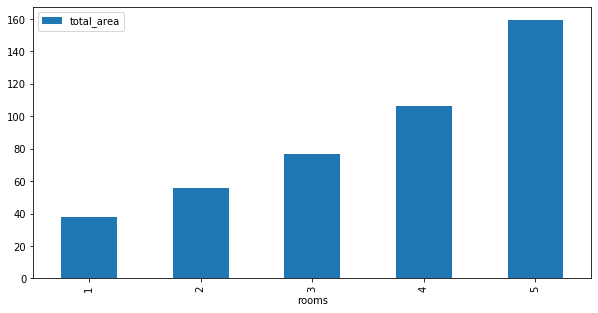

In [91]:
df.pivot_table(index='rooms', values='total_area', aggfunc='mean').plot(y='total_area', kind='bar', 
                                                                              figsize=(10, 5))

Видим, что чем больше комант в квартире, тем выше её стоимость. Это подтверждает выдвинутую ранее гипотезу. Следовательно, цена квартиры связана с количеством комнат ковсвенно через площадь квартиры.

Корреляция между ценой квартиры и индексом этажности довольно слабая, однако это подтверждено лишь значением коэффициента корреляции. На практике цена квартиры также зависит от этажности: цены на квартиры на 1-2 этажах будут ниже, чем цены на квартиры на 3-6 этажах. В свою очередь цены на квартиры на 3-6 этажах будут ниже, чем цены на квартиры на 7 и выше этажах. Это связано с тем, что на первых этажах есть неудобства в виде шума от людей на улице и машин на дорогах, а также от жильцов, которые, к примеру, пользуются лифтом. Этажи 3-6 негласно называют "золотой серединой", этот сегмент для жильца со средним бюджетом. Чем выше этаж, тем дороже квартира. Это объясняется некоторыми привелегиями, доступным жильцам на этих этажах. К примеру, им доступен более роскошный вид из окна, а также меньше шума над головой.

Корреляция между ценой квартиры и расстоянием до центра поражает - слабая отрицательная. Однако не стоит принимать за чистую монету и это значение корреляции. На практике бывает и так, что близкая к центру, но с худшими условиями квартиры и (или) дома, неблагоприятным районом, соседями с претензией на статус "социально неблагополучный" и отходоперерабатывающим или промышленным производством за углом будет стоить меньше, чем удалённая от центра, но вполне себе фешенебельная лакшери квартирка-студия с приятными соседями, хорошей экологией с зоной для выгула собакенов.

Так, в случаях с полями floor_apartment_index и cityCenters_nearest можем говорить об отсутствии именно линейной зависимости. Меж тем эмпирическую зависимость мы выявили в ходе рассуждений, поэтому можно утверждать, что между ценой квартиры и полями floor_apartment_index и cityCenters_nearest зависимость всё же существует, но она более сложная и не может быть оценена с помощью коэффициента корреляции, который оценивает только линейную зависимость.

Проанализируем зависимость цены квартиры от признаков, с которыми у цены квартиры нет очевидной линейной зависимости.

Сначала проанализируем признак cityCenters_nearest. 

Для этого создадим сводную таблицу, в которой сгруппируем данные по расстоянию до центра и для каждого расстояния рассчитаем среднее значение. На основе полученной таблицы построим график. 

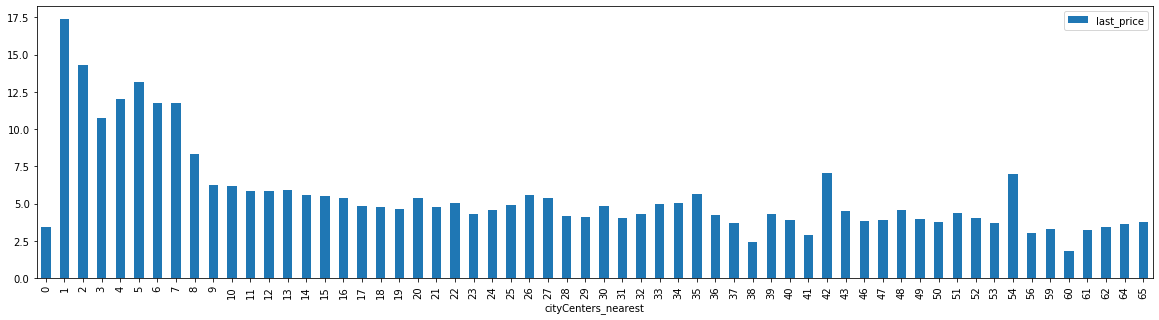

In [92]:
df.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(y='last_price', 
kind='bar', figsize=(20, 5))

Из графика видим, что средняя цена квартир, которые находятся на расстоянии менее 1 км до центра (в данном случае расстояние равно 0, так как мы свели расстояния в метрах к километрам с последующим округлением до целого значения), что подтвержает ранее выдвинутую гипотезу. На это уже указывает тот факт, что средняя цена за квартиру, находящуюся в 3 км. от центра, ниже, чем на квартиры, находящиеся в 4-7 км. от центра. После 8 км. и дальше цены постепенно снижаются, иногда возникают незначительные всплески. Вместе с тем нельзя сказать о наличии тенденции к снижению стоимости квартир по мере удаления их от центра.

Аналогичную операцию проделаем и для поля floor_apartment_index. При этом всё так же исследуем только объявления о тех квартирах, которые расположены на первом или последнем этаже.

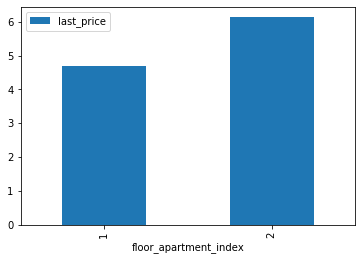

In [93]:
df.query('floor_apartment_index == 1 or floor_apartment_index == 2').pivot_table(index='floor_apartment_index', 
values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')

Данный график подтверждает гипотезу о том, что цена на квартиру, расположенную на последнем этаже дома, выше, чем цена на квартиру, расположенную на первом этаже дома. 

Чтобы получить более полную картину, исследуем цены на квартиры независимо от индекса этажности.

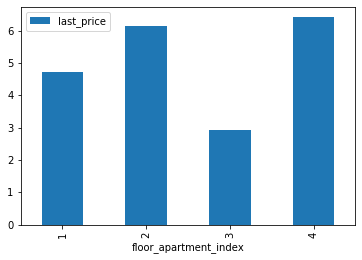

In [94]:
df.pivot_table(index='floor_apartment_index', values='last_price', aggfunc='mean').plot(y='last_price', kind='bar')

Второй график также подтвержает гипотезу о том, что квартира, расположенная на этаже, отличном от первого и последнего, стоит выше, чем квартира на первом этаже. Вместе с тем есть также и квартиры, для которых первый этаж является и последним. Предположу, что речь может идти о частных домах типа котеджа, где этажей в принципе нет, или же о жилых одноэтажных застройках (я такую один раз даже видел).

Далее исследуем зависимость цены квартиры от даты размещения: дня, месяца и года. Для начала также воспользуемся коэффициентом корреляции.

In [95]:
round((df[['last_price', 'day_exposition', 'month_exposition', 'year_exposition']].corr().head(1)), 2)

,last_price,day_exposition,month_exposition,year_exposition
last_price,1.0,0.0,-0.0,-0.05


Видим, что значения коэффициента корреляции не указывают на наличие какой-либо зависимости от даты размещения объявления. Вместе с тем эмпирически эту зависимость можно идентифицировать: так, например, в продаже квартир не последнее место занимает фактор сезонности: спрос на квартиры может быть выше, скажем, летом, когда люди более склонны к активому поведению, и меньше зимой, когда холод и морозы не очень располагают к поиску новых квартир и вытекающему из этого переезду. Также могут иметь место экономические и политические факторы: к примеру, если экономика экспортоориентировання на какой-то сезонный товар, в этот сезон в стране будет больше валюты, следовательно и спрос и цены на жильё будут выше, а в несезонные периоды - меньше.

Чтобы исследовать зависимость более подробно, обратимся к столбчатой диаграмме. Для этого сгруппируем наши объявления по дням, месяцам и годам, для каждого параметра рассчитаем среднюю стоимость квартиры и выведем это на график. 

Чтобы не рисовать отдельно 3 графика, воспользуемся циклом.

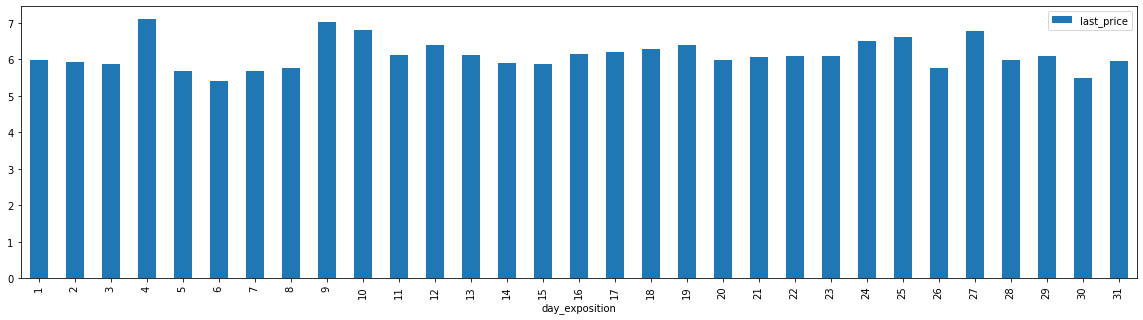

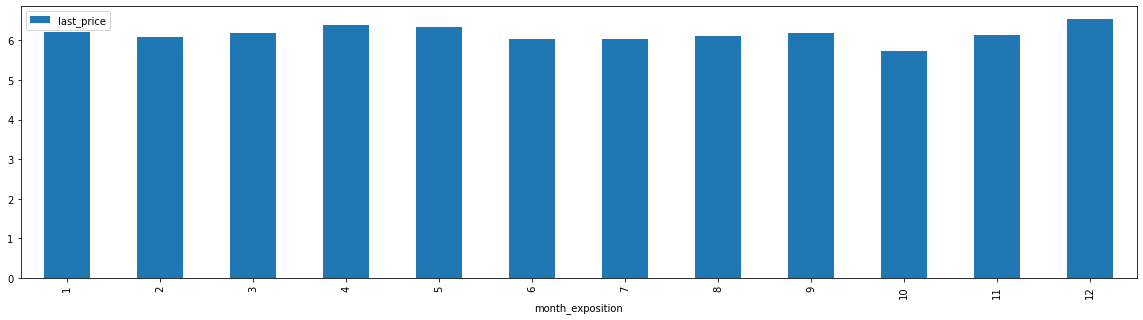

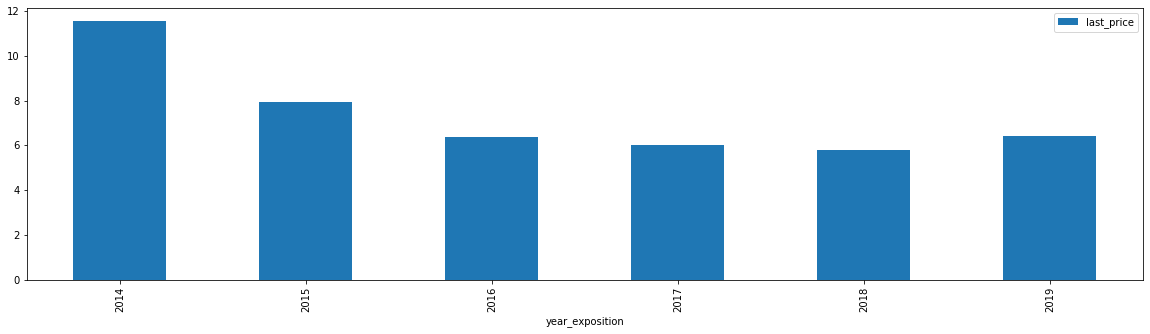

In [96]:
for col in ['day_exposition', 'month_exposition', 'year_exposition']:
    df.pivot_table(index=col, values='last_price', aggfunc='mean').plot(y='last_price', kind='bar', figsize = (20, 5))

Попытаемся интерпретировать информацию из графиков:

1. Зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день - видим небольшие падения цен 6-7, 13-14, 20-21 и 27-28. Однако это кажется в большей степени совпадением, так как в масштабе дней коньюнктура рынка может меняться только под воздействием шоков, что в нашем случае не является справедливым: данные ведут себя относительно спокойно.


2. Зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен.


3. Ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. В целом это можно объяснить наличием в выборке объявлений в регионах, в которых могут проживать люди с меньшим заработкам, чем в крупных городах вроде Питера или Москвы. Соответственно, по закону рынка квартира должна стоить столько, сколько за неё готовы отдать, и если ценник на квартиру неподъёмно высок для региона, он будет спускаться вниз до тех пор, пока людям это не станет по карману. Вместе с тем снижение цен, как сейчас любят говорить экономисты, можно также объяснить падением покупательской способности населения на фоне затяжного финансово-экономического кризиса, который хоть и отрицается официально, но всё же буйствует в некоторых регионах.

<a href='#title'>К оглавлению.</a> 

<a id='4.5'></a> 
## Этап 4.5. Задание "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья"

В поиске 10 населённых пунктов с наибольшим числом объявлений нам поможет сводная таблица.

In [97]:
df_4_5 = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc = ['count', 'mean'])
df_4_5.columns = ['count', 'mean']
df_4_5.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13507,0.113192
посёлок Мурино,390,0.085846
посёлок Шушары,382,0.078743
Всеволожск,343,0.069359
Пушкин,323,0.102972
Колпино,310,0.074903
посёлок Парголово,288,0.091111
Гатчина,280,0.068750
деревня Кудрово,221,0.092443


В данной таблице представлены топ-10 населённых пунктов по количеству объявлений о продаже квартир. Ожидаемо, что лидером оказался Санкт-Петербург - в крупных населённых пунктах чаще совершаются сделки купли-продажи недвижимости, так как люди чаще переезжают, при этом переезд может быть как внутри населённого пукнта, так и эмиграция/иммиграция.

In [98]:
df_4_5.sort_values('mean', ascending = False).head(1)

,count,mean
locality_name,,
Санкт-Петербург,13507,0.113192


Ожидаемо, что наиболее высокая стоимость 1 кв.м. характерна для Санкт-Петербурга, так как он, наравне с Москвой, считается наиболе дорогостоящим для проживания регионом. Стоимость 1 кв.м. в Санкт-Петербурге в среднем достигает около 114 тыс. рублей. А кто-то столько в месяц не получает. Эх.

Справедливости ради отмечу, что стоимость может оправдана тамошней атмосферой и изобилием объектов культурного наследия. А разводные мосты, белые ночи...Питер one love, в общем.

In [99]:
df_4_5.sort_values('mean', ascending = True).head(1)

,count,mean
locality_name,,
деревня Ям-Тесово,1,0.01


Напротив, деревня Ям-Тесово приветливо встречает потенциальных покупателей со средней стоимостью 1 кв.м. в 10 тыс. рублей. Чтобы накопить на квартиру в Ям-Тесово, придётся изрядно постараться, конечно, но выглядит более осуществимо, чем недвижимость в Санкт-Петербурге.

<a href='#title'>К оглавлению.</a> 

<a id='4.6'></a> 
## Этап 4.6. Задание "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона"

Отмечу, что мы уже преобразовали поле cityCenters_nearest, сведя данные из метров в километры, на шаге 2.4.
Для выполнения задания сформируем новый набор данных, используя срез данных.

In [100]:
df_4_6 = df.query('locality_name == "Санкт-Петербург"')

Для подсчтёта средней цены для квартиры для каждого километра от центра воспользуемся сводной таблицей. Сгруппируем данные по километрам от центра, в качестве значения укажем поле last_price, агрегирующей функцией укажем mean.

In [101]:
df_4_6.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')

,last_price
cityCenters_nearest,
0,19.868829
1,17.365795
2,14.304563
3,10.741704
4,11.990561
5,13.188019
6,11.745550
7,11.718747
8,8.343490


Видим, что все километры были сгруппированы в группы от 0 до 29. Следовательно, на расстоянии более чем 29 км. от центра квартиры не продаются, а ближе всего к центру квартиры, собранные в группу, где расстояние до центра составляет 0 км., т.е. меньше одного километра.

Построим график на основе этих данных и посмотрим на изменение цен на квартиры в зависимости от их удалённость от центра.

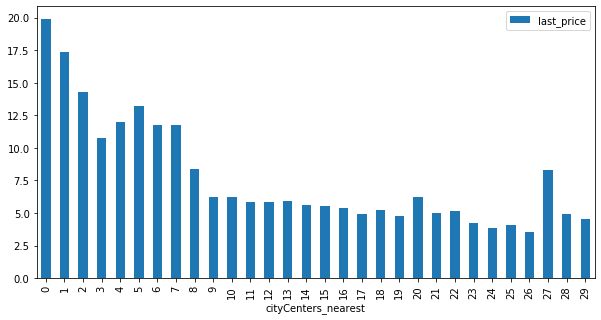

In [102]:
df_4_6.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(y='last_price',
kind='bar', figsize=(10,5))

Инетрпретируя график, можно сделать как минимум 2 вывода о том, где всё-таки начинается центральная зона в Санкт-Петербурге:

1. На 3 км. цена на квартиры значительно падает. Можно сделать вывод о том, что центральной зоной считается зона в 2 км. от центра города включительно.


2. Если предположить, что падение цен на квартиры в 3 км. от центра вызвано лишь тем, что в данную группу попали квартиры низкого качества и что для их продажи продавец сознательно поставил цену ниже более качественных соседей, а также принять во внимание, что, во-первых, после 3 км. цены на растут вплоть до 5 км. от центра, во-вторых, второе снижение цен наблюдается только на 8 км., можно заключить о том, что в центральную зону входят квартиры на расстоянии не более 8 км., так как на 9 км. и далее снижение цены более существенное, чем можно было наблюдать ранее.

Второй вариант в масштабах Санкт-Петербурга выглядит более убедительным, его предлагаю использовать как рабочий.

<a href='#title'>К оглавлению.</a> 

<a id='4.7'></a> 
## Этап 4.7. Задание "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу"

Для выполнения задания сформируем 2 среза данных:

1. В первом срезе будут данные об объявлениях по продаже квартир в центре Санкт-Петербурга (т.е. с расстоянием до центра не более 8 км.).

2. Во втором срезе будут данные об объявлениях по продаже квартир вне центра Санкт-Петербурга.    

In [103]:
df_4_7_center = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 8')
df_4_7_not_center = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 8')

Изучим квартиры в центральном районе по следующим полям: total_area, last_price, rooms, ceiling_height. Для этого построим гистограмму распределения для каждого параметра, используя цикл.

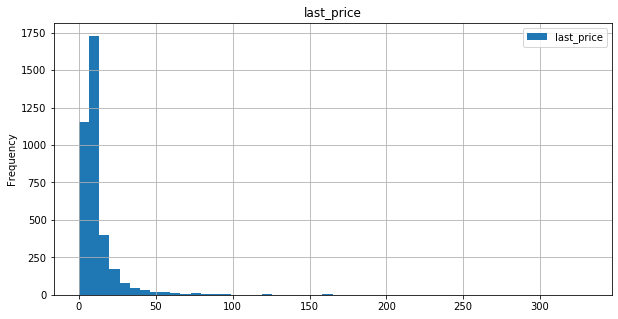

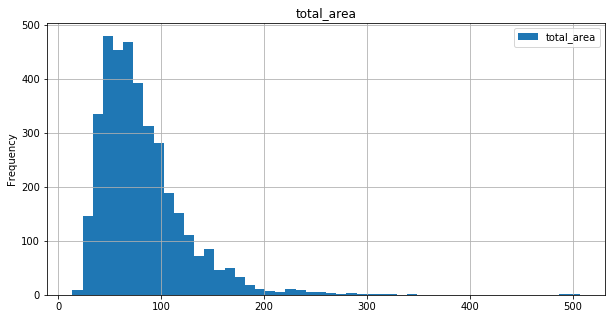

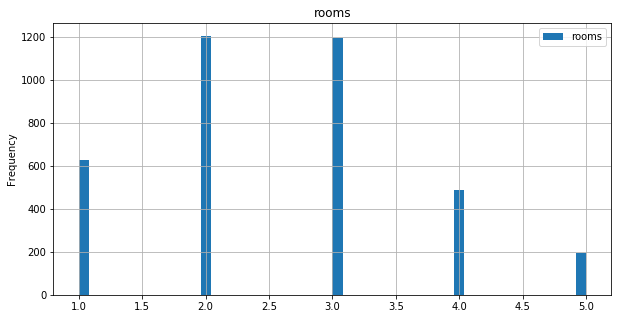

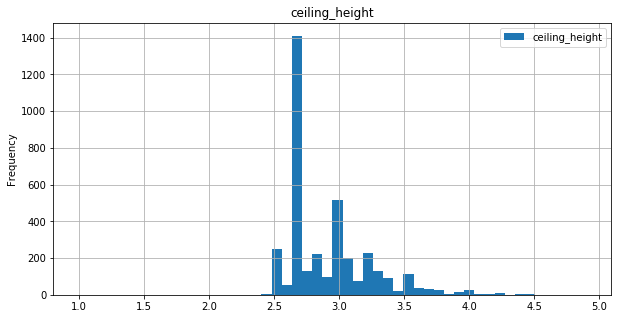

In [104]:
for col in df_4_7_center:
    if col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
        df_4_7_center.plot(y = col, kind = 'hist', grid = True, figsize = (10,5), 
                           bins = 50, title = col, range = (df[col].min(), df[col].max()))
    else:
        continue

Дадим интерпретацию информации из графиков:

1. Поле last_price: основная ценовая категория квартир в центре Санкт-Петербурга - квартиры до 50 млн. рублей. Из них основная часть сосредоточена в ценовом диапазоне от 15 до 25-30 млн. рублей. После отметки в 50 млн. имеем длинный правый хвост из малого количества дорогих квартир. 

2. Поле total_area: основная часть квартир - до 200 кв.м., после этой отметки имеем длинный правый хвост из редковстречающихся огромных квартир площадью более 200 кв.м. Наиболее часто встрачаемая площадь квартир - где-то от 25 до 75 кв.м.

3. Поле rooms: чаще всего встречаются двух- и трёхкомнатные квартиры. Чуть менее часто - однушки. Ещё менее часто встречаются квартиры, в которых больше 3 комнат, если конкретно - 4 и 5, при этом четырёхкомнатные квартиры встречаются чаще пятикомнатных.

4. Поле ceiling_height: чаще всего встречаются квартиры, где высота потолка составляет около 2.7 м., реже - около 3 м.

Изучим влияние на цену квартиры таких факторов, как day_exposition, month_exposition, year_exposition, rooms, floor_apartment_index, cityCenters_nearest.

Для этого составим сводную таблицу для каждого из влияющих параметров, в которой сгруппируем данные по каждому из параметров, в качестве параметра передадим last_price, в качестве агрегирующей функции - mean. Следом на основе каждой сводной таблицы построим столбчатую диаграмму. Для выполнения всего этого счастья используем цикл.

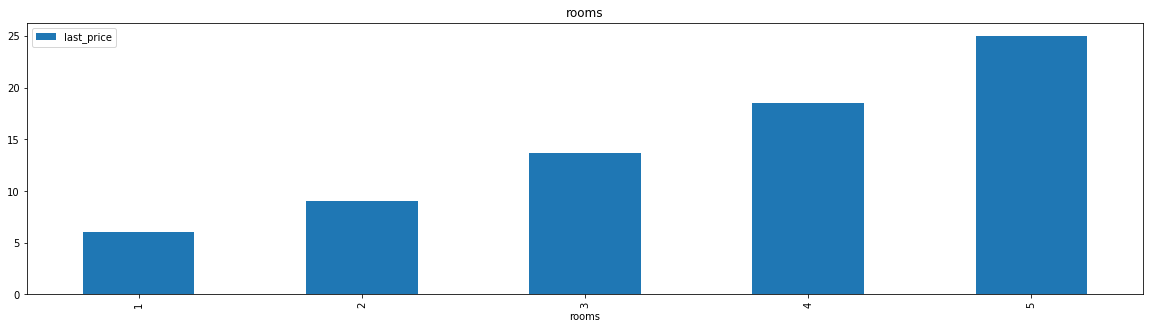

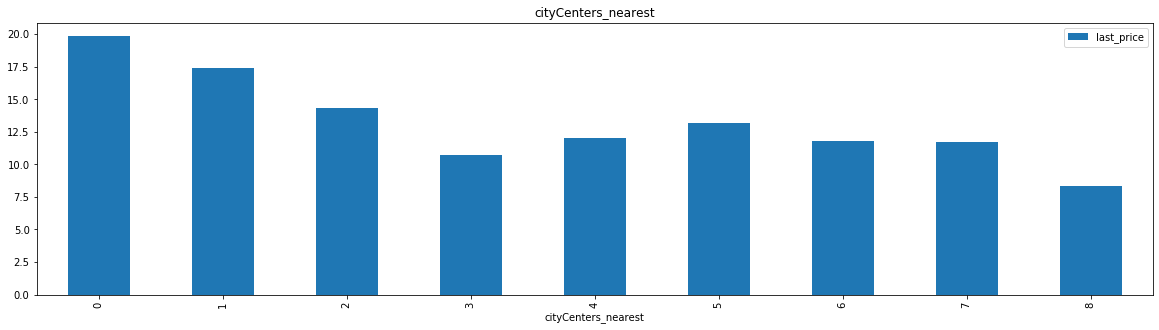

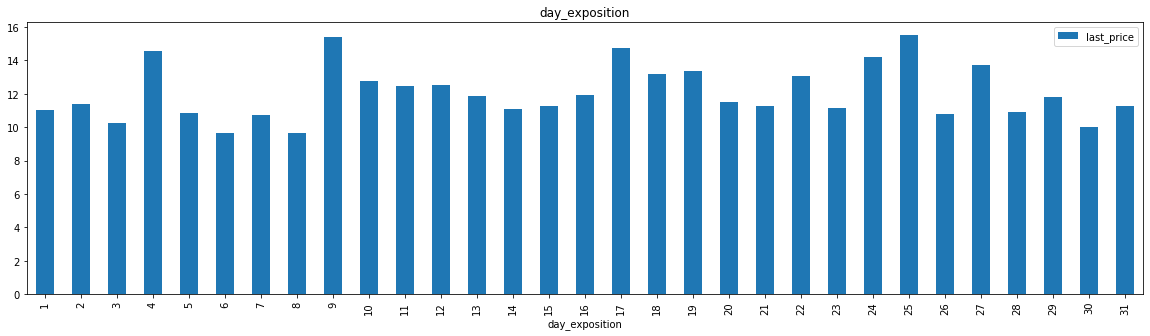

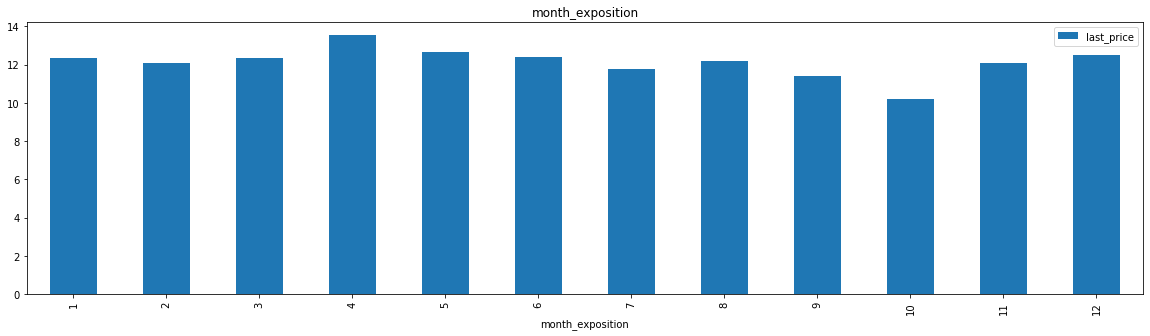

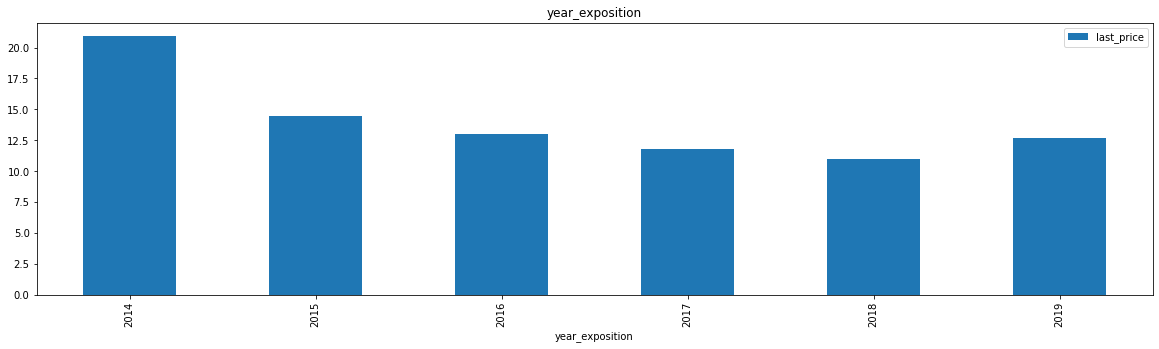

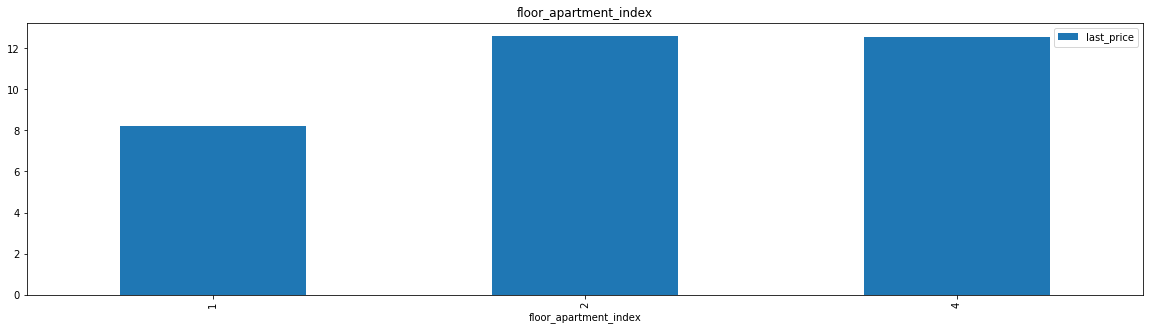

In [105]:
for col in df_4_7_center:
    if col in ['day_exposition', 'month_exposition', 'year_exposition', 'rooms', 'floor_apartment_index', 
'cityCenters_nearest']:
        df_4_7_center.sort_values(col).pivot_table(index = col, values = 'last_price', aggfunc = 'mean').plot(y = 'last_price', 
kind = 'bar', figsize = (20, 5), title = col)

Попытаемся интерпретировать информацию из графиков:

1. Поле rooms: ранее мы уже убедились в том, что для всего набора днных цена на квартиру связана с количеством комнат косвенно через площадь. Здесь мы убеждаемся в наличии ещё и прямой зависимости: чем больше комнат в квартире, тем она дороже. Хотя это также может быть объяснено за счёт роста площади квартиры по мере роста комнат.


2. Поле cityCenters_nearest: видим, что наиболее дорогие квартиры - те, у которых расстояние до центра не превышает 3 км. При этом чем меньше расстояние, тем выше цена. После 3 км. идёт колебание в ценах, но цена, помимо расстояния до центра, зависит и от влияния других параметров.


3. Поле floor_apartment_index: цена на квартиры на первом этаже ниже, чем цена на квартиры на более высоких этажах. В свою очередь цена этих квартир ниже, чем цена на квартиры на последнем этаже. Как писалось ранее, такая динамика может быть объяснена такими параметрами, как комфорт, шум, вид из окна и т.д. Отмечу, что в центральном райное нет квартир, где 1 этаж является последним, что ранее мы классифицировали как частный дом или одноэтажную жилую застройку.


4. Поля day_exposition, month_exposition', year_exposition: зависимость цены квартиры от этих полей для квартир Санкт-Петербурга в центре перекликается в зависиомостью цены на квартиры от этих параметров, которые мы выявили для всех объявлений:


- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. 

Проанализируем зависимость цен на квартиры по тем же параметрам, только теперь за центральным районом Санкт-Петербурга.

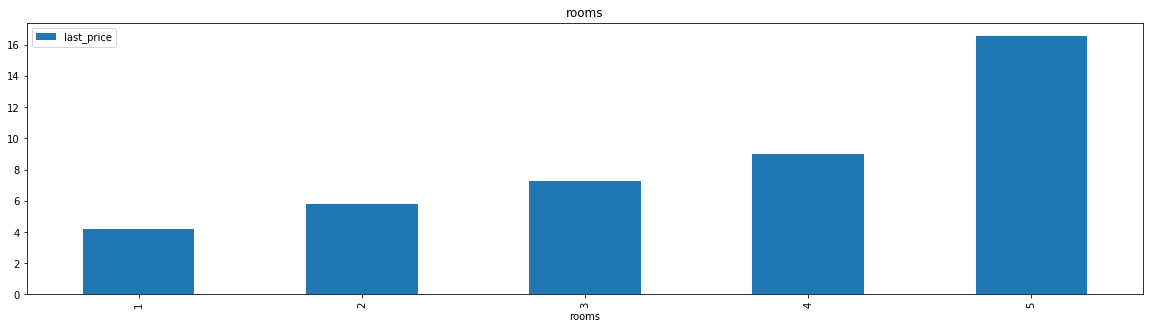

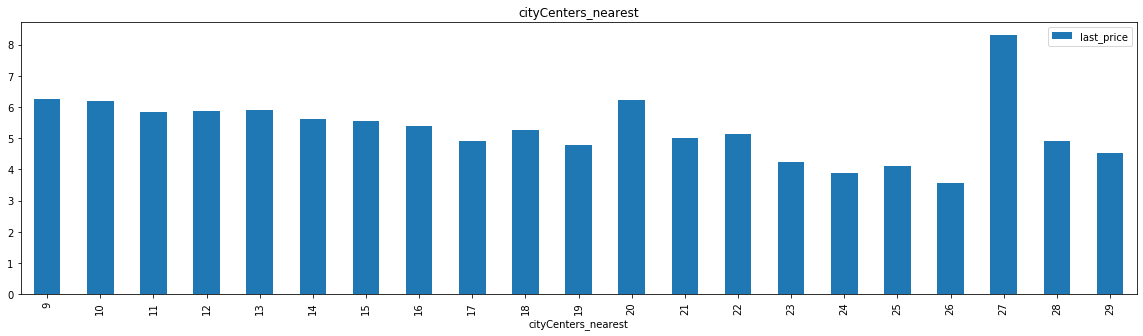

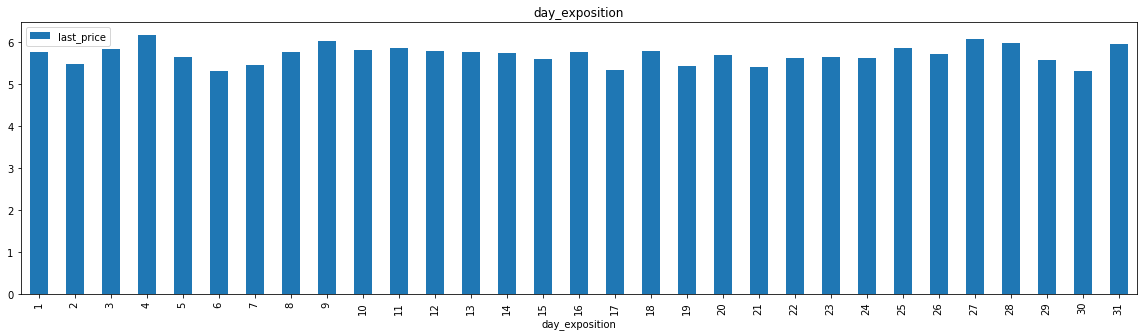

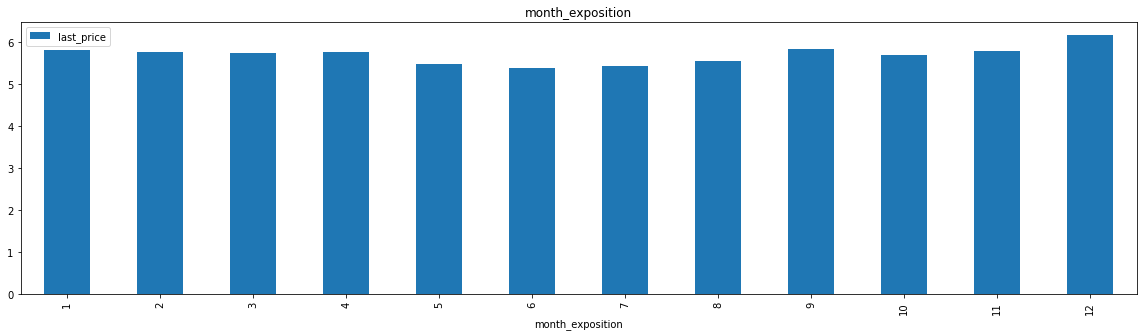

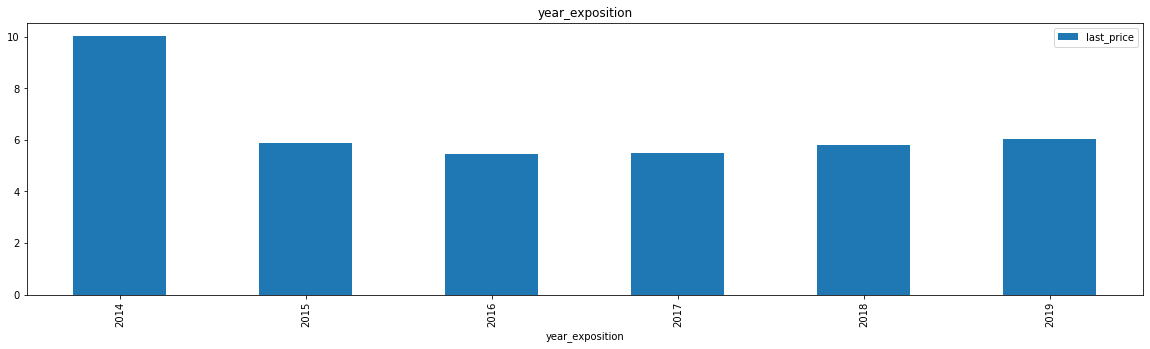

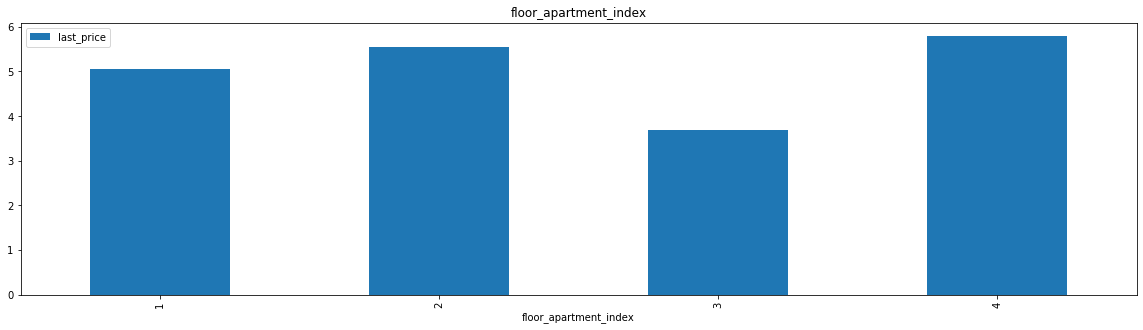

In [106]:
for col in df_4_7_not_center:
    if col in ['day_exposition', 'month_exposition', 'year_exposition', 'rooms', 'floor_apartment_index', 
'cityCenters_nearest']:
        df_4_7_not_center.sort_values(col).pivot_table(index=col, values='last_price', aggfunc='mean').plot(y='last_price', 
kind='bar', figsize=(20, 5), title=col)

Дадим графикам интерпретацию и сравним выводы с выводами, полученными при исследовании зависимости цены на квартиры от тех же параметров, но в центральном районе Санкт-Петербурга.

1. Поле rooms: ситуация с квартирами вне центра не отличается от ситуации с квартирами в центре: чем больше комнат и, соответственно, площадь, тем выше цена на эти квартиры.


2. Поле cityCenters_nearest: видим, цена на квартиры, как и в случае с квартирами в центре, снижается по мере отдаления от центра, за некоторым исключением для квартир, расположенных в 20 и 27 км.: цена на них выше, чем цена на их более близких к центру соседей, однако это может быть обусловлено наличием в этих квартирах каких-нибудь приятных плюшек, которыми не могут похвастать менее дорогостоящие соседи.


3. Поле floor_apartment_index: ситуация также в некоторой степени напоминает ситуацию с квартирами в центре: квартиры на 1 этаже дешевле квартир на более высоких этажах, а те, в свою очередь, дешевле квартиры на последнем этаже. Вместе с тем для квартир, которые находятся вне центра, характерна отличительная черта - наличие квартир, у которых первый этаж является и последним, т.е. речь о частных или одноэтажных жилых застройках. При этом цена на них ниже, чем на квартиру на 1 этаже.


4. Поля day_exposition, month_exposition', year_exposition: зависимость цены от этих полей для квартир Санкт-Петербурга вне центра перекликается в зависиомостью цены от этих параметров для квартир в центре Санкт-Петербурга:


- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. Однако цены на эти квартиры в 2018 году выше, чем в 2017 году, что отличает их от квартир в центре Санкт-Петербурга.

Таким образом, за исключением некоторых частностей, можно говорить о том, что изучаемые параметры - количество комнат, индекс этажности, расстояние до центра и дата размещения - одинаково влияют на цену квартиры как в центре, так и за его пределами.

<a href='#title'>К оглавлению.</a> 

# Вывод по этапу 4.

На данном этапе был проведён исследовательский анализ данных. 

В основном все значения исследуемых полей - total_area, kitchen_area, living_area, last_price, ceiling_height -  кроме условно-категориального поля room, сосредоточены в левой части гистограммы с длинным низким хвостом высоких значений в правой части гистограммы. 

Распределение в этих полях напоминает распределение Пуассона. Из гистограмм можно заключить, что в основной массе преобладают объявления с квартирами, если позволите, "средней руки": для них характерна общая площадь до 100 кв.м., площадь кухни - где-то до 15-16 кв.м. жилая площадь - где-то до 50 кв.м. 

Наиболее частая цена на такие квартиры лежит в диапазоне до 20-25 млн. руб., а высота потолка в таких квартирах - от 2.5 до 3 м. Чаще всего встречаются квартиры с количеством комнат от 1 до 3, реже встречаются четырёхкомнатные квартиры, а квартиры с пятью комнатами можно по пальцам руки посчитать.

В среднем каждое объявление находится на платформе 173 дня, при этом присутствует высокое стандартное отклонение, что говорит о большом отклонении длительности нахождения объявлений на платформе некоторых объявлений от средней длительности. 

Наиболее удачными можно считать объявления, которые были размещены на платформе всего лишь 1 день. Хорошая, видимо, квартира. 

Напротив, наименее привлекательное объявление находилось на платформе 1572 дня, а это, на минутку, 4 года и ещё треть пятого. Видимо, владелец никогда не сдаётся, что не может не радовать, но и предмет объявления тоже нужно оценивать адекватно. 

Медианная длительность нахождения объявления на платформе - 101 день. Это значение делит нашу выборку на "до 101 дня" и "после 101 дня" нахождения объявления на платформе. 

Четверть объявлений из выборки находились на платформе не более 48 дней (1 квартиль), 3/4 объявлений из выборки находились на платформе не более 204 дней.

Объявления по признаку количества дней нахождения на платформе имеют распределение Пуассона: видим скполение основной массы объявлений в левой части гисторграммы и длинный хвост в правой части гистограммы, описывающий распределение тех квартир, объявления о которых находились на платформе очень долго.

В ответе на вопрос о том, при какой длительности нахождения объявления на плафторме можно считать, что продажа прошла быстро, а при какой длительности можно говорить о медленной продаже, ящик с усами нам подсказывает:

- если объявление находится на платформе не более 48 дней, квартира продаётся очень быстро. Блиц - скорость без границ!;


- если объявление находится на платформе не более 101 дня, можно говорить о том, что квартира продаётся не очень быстро, но всё ещё нормально без аномально высоких сроков;


- если объявление находится на платформе не более 204 дней, можно говорить о том, что квартира продаётся медленно, но не аномально медленно;


- количество нахождения объявления на платформе не более около 420 дней говорит о том, что квартира продаётся очень медленно, но пока что клиент ещё не входит в зону аномальных объявлений с аномально большим количеством дней находления их на платформе. Вместе с тем практика, когда квартира продатёся ~1 год, кажется нормальной, если переносить этот вывод на реальный рынок недвижимости;


- если объявление находится на платформе более 420 дней, оно сваливается в категорию аномальных, а рассчитывать на его продажу в принципе не приходится.

Были построены ящики с усами для тех же полей, в которых были идентифицированы аномальные значения. Напомню, что это поля rooms, ceiling_height и balcony.

По итогам анализа пришли к выводу о том, что эти поля не содержат аномальных значений, за исключением поля ceiling_height.

Выбросами в данном поле считается высота потолка меньшая, чем 2,4 метра, и большая, чем 2.8 метров. Об аномальности значений этого поля мы уже говорили ранее: потолки высотой до 3 метров не очень лаконично вписываются в картину мира среднестатистического человека, однако квартир с такой высотой потолка большинство, и удалять их не следует, так как набор данных потеряет в информативности.

О наличии выбросов в других полях однозначно сказать сложно: к примеру, большое значения поля total_area, kitchen_area или living_area вполне может иметь место быть, так как на платформе могут быть размещены объявления о продаже очень больших квартир. Отсюда проистекает наличие в наборе данных объявлений с условно-аномальной стоимостью: чем больше количество кв.м., тем выше стоимость квартиры. Поэтому и в поле last_price однозначно определить выбросы - задача проблематичная.

Коэффициент корреляции позволил выявить следующие зависмости между: 

- ценой квартиры и площадью квартиры - средняя прямая;


- ценой квартиры и количеством комнат - средняя прямая;


- ценой квартиры и индексом этажности - низкая прямая;


- ценой квартиры и удалённостью от центра - низкая обратная.

Отмечу также, что коэффициент корреляции не позволяет доподлинно утверждать о наличии или отсутствии зависимости между изучаемыми показателями, а лишь показывает наличие или отсутствие связи между показателями, а также тесноту этой связи, в рамках изучаемой выборки.

Так, коэффициент корреляции указал на среднюю зависимость между ценой квартиры и её площадью. Действительно, на практике принято указывать стоимть квартиры, которая в свою очередь складывается стоимости 1 кв.м. в этой квартире, умноженной на количество кв.м. в квартире. Поэтому коэффициент корреляции подтверждает гипотезу о том, что стоимость квартиры зависит от площади квартиры.

Коэффициент корреляции также указывает на наличие средней зависимости между ценой квартиры и количеством комнат, однако несмотря на то, что оба поля - площадь и количество комнат - попали в категорию "средняя зависимость", зависимость между ценой и количеством комнат куда ниже, чем между ценой и площадью. На практике количество комнат играет не самую значимую роль при ценообразовании, так как количество комнат зависит от ряда других факторов, таких как планировка, тип дома, год его постройки и др. Поэтому всё же большее влияние на цену квартиры оказывает именно её площадь. Однако можно проследить тесную зависимость между количеством комнат и площадью, поэтому можно говорить о том, что площадь и количество комант между собой неразрывно связаны.

Корреляция между ценой квартиры и индексом этажности довольно слабая, однако это подтверждено лишь значением коэффициента корреляции. На практике цена квартиры также зависит от этажности: цены на квартиры на 1-2 этажах будут ниже, чем цены на квартиры на 3-6 этажах. В свою очередь цены на квартиры на 3-6 этажах будут ниже, чем цены на квартиры на 7 и выше этажах. Это связано с тем, что на первых этажах есть неудобства в виде шума от людей на улице и машин на дорогах, а также от жильцов, которые, к примеру, пользуются лифтом. Этажи 3-6 негласно называют "золотой серединой", этот сегмент для жильца со средним бюджетом. Чем выше этаж, тем дороже квартира. Это объясняется некоторыми привелегиями, доступным жильцам на этих этажах. К примеру, им доступен более роскошный вид из окна, а также меньше шума над головой.

Корреляция между ценой квартиры и расстоянием до центра поражает - слабая отрицательная. Однако не стоит принимать за чистую монету и это значение корреляции. На практике бывает и так, что близкая к центру, но с худшими условиями квартиры и (или) дома, неблагоприятным районом, соседями с претензией на статус "социально неблагополучный" и отходоперерабатывающим или промышленным производством за углом будет стоить меньше, чем удалённая от центра, но вполне себе фешенебельная лакшери квартирка-студия с приятными соседями, хорошей экологией с зоной для выгула собакенов.

Так, в случаях с полями floor_apartment_index и cityCenters_nearest можем говорить об отсутствии именно линейной зависимости. Меж тем эмпирическую зависимость мы выявили в ходе рассуждений, поэтому можно утверждать, что между ценой квартиры и полями floor_apartment_index и cityCenters_nearest зависимость всё же существует, но она более сложная и не может быть оценена с помощью коэффициента корреляции, который оценивает только линейную зависимость.

Средняя цена квартир, которые находятся на расстоянии менее 1 км до центра (в данном случае расстояние равно 0, так как мы свели расстояния в метрах к километрам с последующим округлением до целого значения), что подтвержает ранее выдвинутую гипотезу. На это уже указывает тот факт, что средняя цена за квартиру, находящуюся в 3 км. от центра, ниже, чем на квартиры, находящиеся в 4-7 км. от центра. После 8 км. и дальше цены постепенно снижаются, иногда возникают незначительные всплески. Вместе с тем нельзя сказать о наличии тенденции к снижению стоимости квартир по мере удаления их от центра.

Квартира, расположенная на этаже, отличном от первого и последнего, стоит выше, чем квартира на первом этаже. Вместе с тем есть также и квартиры, для которых первый этаж является и последним. Предположу, что речь может идти о частных домах типа котеджа, где этажей в принципе нет, или же о жилых одноэтажных застройках (я такую один раз даже видел).

Значения коэффициента корреляции не указывают на наличие какой-либо зависимости от даты размещения объявления. Вместе с тем эмпирически эту зависимость можно идентифицировать: так, например, в продаже квартир не последнее место занимает фактор сезонности: спрос на квартиры может быть выше, скажем, летом, когда люди более склонны к активому поведению, и меньше зимой, когда холод и морозы не очень располагают к поиску новых квартир и вытекающему из этого переезду. Также могут иметь место экономические и политические факторы: к примеру, если экономика экспортоориентировання на какой-то сезонный товар, в этот сезон в стране будет больше валюты, следовательно и спрос и цены на жильё будут выше, а в несезонные периоды - меньше.

При построении графиков зависимости цены квартиры от дня, месяца и года публикации объявления были получены следующие выводы:

- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день - видим небольшие падения цен 6-7, 13-14, 20-21 и 27-28. Однако это кажется в большей степени совпадением, так как в масштабе дней коньюнктура рынка может меняться только под воздействием шоков, что в нашем случае не является справедливым: данные ведут себя относительно спокойно;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. В целом это можно объяснить наличием в выборке объявлений в регионах, в которых могут проживать люди с меньшим заработкам, чем в крупных городах вроде Питера или Москвы. Соответственно, по закону рынка квартира должна стоить столько, сколько за неё готовы отдать, и если ценник на квартиру неподъёмно высок для региона, он будет спускаться вниз до тех пор, пока людям это не станет по карману. Вместе с тем снижение цен, как сейчас любят говорить экономисты, можно также объяснить падением покупательской способности населения на фоне затяжного финансово-экономического кризиса, который хоть и отрицается официально, но всё же буйствует в некоторых регионах.

Лидером по количеству объявлений в населённых пунктах оказался Санкт-Петербург - в крупных населённых пунктах чаще совершаются сделки купли-продажи недвижимости, так как люди чаще переезжают, при этом переезд может быть как внутри населённого пукнта, так и эмиграция/иммиграция.

Наиболее высокая стоимость 1 кв.м. характерна для Санкт-Петербурга, так как он, наравне с Москвой, считается наиболе дорогостоящим для проживания регионом. Стоимость 1 кв.м. в Санкт-Петербурге в среднем достигает около 114 тыс. рублей. А кто-то столько в месяц не получает. Эх. Справедливости ради отмечу, что стоимость может оправдана тамошней атмосферой и изобилием объектов культурного наследия. А разводные мосты, белые ночи...Питер one love, в общем.

Напротив, деревня Ям-Тесово приветливо встречает потенциальных покупателей со средней стоимостью 1 кв.м. в 10 тыс. рублей. Чтобы накопить на квартиру в Ям-Тесово, придётся изрядно постараться, конечно, но выглядит более осуществимо, чем недвижимость в Санкт-Петербурге.

Было получено 2 вывода о том, где всё-таки начинается центральная зона в Санкт-Петербурге:


- на 3 км. цена на квартиры значительно падает. Можно сделать вывод о том, что центральной зоной считается зона в 2 км. от центра города включительно;


- если предположить, что падение цен на квартиры в 3 км. от центра вызвано лишь тем, что в данную группу попали квартиры низкого качества и что для их продажи продавец сознательно поставил цену ниже более качественных соседей, а также принять во внимание, что, во-первых, после 3 км. цены на растут вплоть до 5 км. от центра, во-вторых, второе снижение цен наблюдается только на 8 км., можно заключить о том, что в центральную зону входят квартиры на расстоянии не более 8 км., так как на 9 км. и далее снижение цены более существенное, чем можно было наблюдать ранее.

Второй вариант в масштабах Санкт-Петербурга выглядит более убедительным, его было предложено использовать как рабочий.

В ходе изучения полей total_area, last_price, rooms, ceiling_height для квартир, находящихся в центре, были сделаны следующие выводы:

- основная ценовая категория квартир в центре Санкт-Петербурга - квартиры до 50 млн. рублей. Из них основная часть сосредоточена в ценовом диапазоне от 15 до 25-30 млн. рублей. После отметки в 50 млн. имеем длинный правый хвост из малого количества дорогих квартир;


- основная часть квартир - до 200 кв.м., после этой отметки имеем длинный правый хвост из редковстречающихся огромных квартир площадью более 200 кв.м. Наиболее часто встрачаемая площадь квартир - где-то от 25 до 75 кв.м.;


- чаще всего встречаются двух- и трёхкомнатные квартиры. Чуть менее часто - однушки. Ещё менее часто встречаются квартиры, в которых больше 3 комнат, если конкретно - 4 и 5, при этом четырёхкомнатные квартиры встречаются чаще пятикомнатных;


- чаще всего встречаются квартиры, где высота потолка составляет около 2.7 м., реже - около 3 м.

В ходе изучения зависимости цены на квартиры в центре Санкт-Петербурга были сделаны следующие выводы:

1. Цена на квартиру связана прямо с количеством комнат и косвенно через площадь. Чем больше комнат в квартире, тем она дороже. Хотя это также может быть объяснено за счёт роста площади квартиры по мере роста комнат.


2. Наиболее дорогие квартиры - те, у которых расстояние до центра не превышает 3 км. При этом чем меньше расстояние, тем выше цена. После 3 км. идёт колебание в ценах, но цена, помимо расстояния до центра, зависит и от влияния других параметров.


3. Цена на квартиры на первом этаже ниже, чем цена на квартиры на более высоких этажах. В свою очередь цена этих квартир ниже, чем цена на квартиры на последнем этаже. Как писалось ранее, такая динамика может быть объяснена такими параметрами, как комфорт, шум, вид из окна и т.д. Отмечу, что в центральном райное нет квартир, где 1 этаж является последним, что ранее мы классифицировали как частный дом или одноэтажную жилую застройку.


4. Зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день.


5. Зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен.


6. Ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается.

Далее были прострены графики зависимости цены квартир вне центра Санкт-Петербурга от тех же параметров, что позволило прийти к следующим выводам: 

1. Ситуация с квартирами вне центра не отличается от ситуации с квартирами в центре: чем больше комнат и, соответственно, площадь, тем выше цена на эти квартиры.


2. Цена на квартиры, как и в случае с квартирами в центре, снижается по мере отдаления от центра, за некоторым исключением для квартир, расположенных в 20 и 27 км.: цена на них выше, чем цена на их более близких к центру соседей, однако это может быть обусловлено наличием в этих квартирах каких-нибудь приятных плюшек, которыми не могут похвастать менее дорогостоящие соседи.


3. Квартиры на 1 этаже дешевле квартир на более высоких этажах, а те, в свою очередь, дешевле квартиры на последнем этаже. Вместе с тем для квартир, которые находятся вне центра, характерна отличительная черта - наличие квартир, у которых первый этаж является и последним, т.е. речь о частных или одноэтажных жилых застройках. При этом цена на них ниже, чем на квартиру на 1 этаже.


4. Зависимость цены от этих полей для квартир Санкт-Петербурга вне центра перекликается в зависиомостью цены от этих параметров для квартир в центре Санкт-Петербурга:


- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. Однако цены на эти квартиры в 2018 году выше, чем в 2017 году, что отличает их от квартир в центре Санкт-Петербурга.


Таким образом, за исключением некоторых частностей, можно говорить о том, что изучаемые параметры - количество комнат, индекс этажности, расстояние до центра и дата размещения - одинаково влияют на цену квартиры как в центре, так и за его пределами.

<a href='#title'>К оглавлению.</a> 

# Итоговый вывод по проекту.

На основе данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет - нужно было научиться определять рыночную стоимость объектов недвижимости. 

В рамках проекта требовалось установить параметры для будущей модели - это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу были доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Проект выполнялся в следующем порядке:

1. Импорт библиотек, считывание и первичный анализ данных.

2. Предобработка данных.

3. Создание новых признаков.

4. Исследовательский анализ данных.

Отметим основные выводы.

# Вывод по этапу 1.

Изучаемый набор данных состоит из 22 колонок.  

Метод shape шепчет, что максимальное количество записей в поле составляет 23699, однако метод info показывает, что количество записей от поля к полю изменяется: где-то пропущена лишь часть данных, а в каких-то полях основная часть содержимого - пропуски. Их природу попытаемся выяснить несколько позже. 

Типы данных в изучаемом наборе данных:

дробные числа (с плавающей точкой) - 14 колонок;
целые числа - 3 колонки;
категориальные поля - 3 колонки;
логические поля (булев тип данных) - 2 колонки. 

Конструкция values_count вкупе с циклом позволяет предварительно проанализировать поля набора данных на наличие каких-либо аномальных значений, при этом избавляет от необходимости прописывать отдельные строки кода для каждого поля набора данных.

В наборе данных содержится большое количество пропусков, которые необходимо будет обработать.

Предварительно - "исходя из моего ощущения цифрового анализа" - можно отметить следующие необычные вещи в данных, на которые следовало бы обратить внимание в ходе дальшейшего анализа:

1. Данные в поле last_price приведены в рублях. Для помещений с небольшой стоимостью это выглядит нормально, но для лакшери апартаментов цифра смотрится крайне вырвиглазно. Целесообразно будет свести эту колонку, например, в тысячи или миллионы. Так как преобразование линейное, на зависимости между данными это не повлияет, а визуально или графически информацию будет воспринмать проще.


2. Данные в поле first_day_exposition приведены в не очень удобном для восприятия (и, потенциально, для дальшейнего анализа) формате. Для удобства стоит перевести тип данных в этом поле в дату в формате "ДД.ММ.ГГГГ ЧЧ:ММ:СС".


3. Данные поля rooms выглядят довольно странно: несложно представить жилое помещение с 3-4 комнатами, если очень напрячь фантазию, абстрагироваться от здравого смысла и представить, что там живёт цыганский табор с отдельной комнатой под стойла - 5-6. Количество комнат от 7 и выше, а уж тем паче - 19 (это максимальное количество комнат в наборе данных) - что-то за гранью фантастики. Возможно, стоит проанализировать какие-то зависимости между этими данными и привести их в порядок, если адекватные зависимости выявлены не будут. При этом в поле также есть значение, равное нулю, однако в контексте жилой недвижимости будет считать, что это просто квартира-студия, в которой и комнат-то нет. Или это одна большая комната.


4. Данные поля ceiling_height также кажутся доволно странными. В рамках экспермиента была сделала сортировка поля ceiling_height со значением "больше 5", чтобы узнать наиболее подозрительные данные в поле. Это позволило прийти к следующему выводу: значения до 5 метров (на мой взгляд, в целом довольно адекватная цифра) занимают основную долю данных в этом поле. После же 5 метров начинается нечто невообразимое: тут есть высота потолков и в 10 метров, что больше характерно для промышленного ангара, чем для некоммерческой жилплощади в Питере, и даже 100 метров, а это уже почти небоскрёб (отмечу, что всего таких аномальных потоков с высотой более 5 метров у нас 36, а это менее 1% от количества записей в целом). С другой стороны, есть и совсем крохотные потолки едва ли выше 2 метров. Будем исходить из допущения, что нормальной будем считать квартиру, где высота потолка находится в диапазоне от 3 до 5 метров включительно.


5. Поле balcony содержит весьма разношёрстную информацию: там есть и нулевые значения, есть пропущенные значения, а есть значения 3, 4, 5. Это кажется что-то непонятным, от чего следует избавиться, так как квартир с таким количеством балконов немного.

# Вывод по этапу 2.

На данном этапе мы занимались предварительной обработкой данных.

Напомню, что для обработки данных условились принять следующую последовательность действий:

1. Преобразование типов данных.

2. Работа с аномалиями.

3. Работа с дубликатами.

4. Работа с пропущенными значениями.

**В ходе преобразования типов данных были совершены следующие преобразования:**

1. Данные поля last_price были переведы из рублей в миллионы рублей.


2. Данные поля first_day_exposition были преобразованы из str в datetime.


3. Данные полей floors_total, balcony, parks_around3000, ponds_around3000, days_exposition преобразованы из float в int.


4. Данные полей airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest переведены из метров в километры с округлением до целого значения.

**В ходе работы с артефактами были идентифицированы и обработаны аномалии в следующих полях:** 

1. rooms: проблема - аномально высокое количество комнат в квартире, порою превышающее 10 единиц, решение - удаление из набора данных записей о квартирах, у которых более 5 комнат.


2. ceiling_height: проблема - аномально высокое значение высоты потолка, превышающее порою 5 метров, решение - удаление из набора данных записей о квартирах, у которых высота потолка превышает 5 метров.


3. balcony: проблема - аномально высокое количество балконов, равное 3, 4 или 5 единицам, решение - удаление из набора данных записей о квартирах, у которых количество балконов превышает 2.

**Дубликаты в наборе данных обнаружены не были.**

**В ходе работы с пропущенными значениями были идентифицированы и обработаны пропуски в следующих полях:**

1. Поля locality_name и floors_total, логика обработки пропусков - удаление из набора данных записей о квартирах, для которых значения полей locality_name и floors_total пропущены ввиду их незначительного количества в масштабах набора данных.


2. Поля living_area и kitchen_area, логика обработки пропусков - удаление из набора данных записей о квартирах, для которых значения полей living_area и kitchen_area пропущены ввиду их незначительного количества в масштабах набора данных.


3. Поле is_apartment, логика обработки пропусков - замена пропущенных значений на False, исходя из допущения, что если данные о принадлежности квартиры к классу апартаментов не были заполнены, эти квартиры априори не являются апартаментами.


4. Поле balcony, логика обработки пропусков - замена пропущенных значений на 0, исходя из допущения, что если информация в поле balcony отсутствует, значит, балкона в квартире нет, поэтому информация о нём в объявлении не была заполнена изначально.


5. Поле ceiling_height, логика обработки пропусков - замена пропущенных значений на медианную высоту полотков, рассчитанную на всём наборе данных, исходя из допущения, что для более практичной логики обработки пропущенных значений в этом поле набора данных не содержит необходимых данных.


6. Поле days_exposition, логика обработки пропусков - замена пропущенных значений на медианное количество дней с момента публикации до снятия объявления, рассчитанное на всём наборе данных, исходя из допущения, что для более практичной логики обработки пропущенных значений в этом поле набора данных не содержит необходимых данных.


7. Поля airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest, логика обработки пропусков - замена пропущенных значений на 0 ввиду того, что предложенный способ обработки пропущенных значений нереализуем на данных имеющегося набора данных.


8. Поля parks_around3000 и ponds_around3000, логика обработки пропусков - замена пропущенных значений на 0 ввиду того, что предложенный способ обработки пропущенных значений нереализуем на данных имеющегося набора данных.

# Вывод по этапу 3.

На данном этапе происходил расчёт новых показателей с их добавлением в набор данных. Были рассчитаны и добавлены следующие показатели:

1. Цена квадратного метра.

2. День недели публикации объявления.

3. Месяц публикации объявления.

4. Год публикации объявления.

5. Этаж квартиры.

6. Соотношение жилой и общей площади.

7. Соотношение площади кухни и общей площади.

Цена квадратного метра была рассчитана как отношение общей площади к квартире к стоимости квартиры на момент снятия объявления.

День недели, месяц и год публикации объявления были извлечены из поля first_day_exposition с помощью метода dt с передачей ему нужного параметра.

Для расчёта этажа квартиры была реализована функция, выполняющая следующие действия:

- если значение поля floor совпадает со значением поля floor_total, функция вернёт значение "последний";

- если поле flor равно 1, функция вернёт значение "первый";

- если поле flor равно 1, при этом поле flor_total также равно 1, функция возвращает значение "один этаж" (немного не по условию, но мне кажется, это логичнее, чем говорить о том, что этаж первый или последний);

- в остальных случаях функция вернёт значение "другой".

Соотношение жилой и общей площади, а также соотношение площади кухни и общей площади были рассчитаны по логике, недвусмысленно указанной в названии этих показателей.

# Выводы по этапу 4

На данном этапе был проведён исследовательский анализ данных. 

В основном все значения исследуемых полей - total_area, kitchen_area, living_area, last_price, ceiling_height -  кроме условно-категориального поля room, сосредоточены в левой части гистограммы с длинным низким хвостом высоких значений в правой части гистограммы. 

Распределение в этих полях напоминает распределение Пуассона. Из гистограмм можно заключить, что в основной массе преобладают объявления с квартирами, если позволите, "средней руки": для них характерна общая площадь до 100 кв.м., площадь кухни - где-то до 15-16 кв.м. жилая площадь - где-то до 50 кв.м. 

Наиболее частая цена на такие квартиры лежит в диапазоне до 20-25 млн. руб., а высота потолка в таких квартирах - от 2.5 до 3 м. Чаще всего встречаются квартиры с количеством комнат от 1 до 3, реже встречаются четырёхкомнатные квартиры, а квартиры с пятью комнатами можно по пальцам руки посчитать.

В среднем каждое объявление находится на платформе 173 дня, при этом присутствует высокое стандартное отклонение, что говорит о большом отклонении длительности нахождения объявлений на платформе некоторых объявлений от средней длительности. 

Наиболее удачными можно считать объявления, которые были размещены на платформе всего лишь 1 день. Хорошая, видимо, квартира. 

Напротив, наименее привлекательное объявление находилось на платформе 1572 дня, а это, на минутку, 4 года и ещё треть пятого. Видимо, владелец никогда не сдаётся, что не может не радовать, но и предмет объявления тоже нужно оценивать адекватно. 

Медианная длительность нахождения объявления на платформе - 101 день. Это значение делит нашу выборку на "до 101 дня" и "после 101 дня" нахождения объявления на платформе. 

Четверть объявлений из выборки находились на платформе не более 48 дней (1 квартиль), 3/4 объявлений из выборки находились на платформе не более 204 дней.

Объявления по признаку количества дней нахождения на платформе имеют распределение Пуассона: видим скполение основной массы объявлений в левой части гисторграммы и длинный хвост в правой части гистограммы, описывающий распределение тех квартир, объявления о которых находились на платформе очень долго.

В ответе на вопрос о том, при какой длительности нахождения объявления на плафторме можно считать, что продажа прошла быстро, а при какой длительности можно говорить о медленной продаже, ящик с усами нам подсказывает:

- если объявление находится на платформе не более 48 дней, квартира продаётся очень быстро. Блиц - скорость без границ!;


- если объявление находится на платформе не более 101 дня, можно говорить о том, что квартира продаётся не очень быстро, но всё ещё нормально без аномально высоких сроков;


- если объявление находится на платформе не более 204 дней, можно говорить о том, что квартира продаётся медленно, но не аномально медленно;


- количество нахождения объявления на платформе не более около 420 дней говорит о том, что квартира продаётся очень медленно, но пока что клиент ещё не входит в зону аномальных объявлений с аномально большим количеством дней находления их на платформе. Вместе с тем практика, когда квартира продатёся ~1 год, кажется нормальной, если переносить этот вывод на реальный рынок недвижимости;


- если объявление находится на платформе более 420 дней, оно сваливается в категорию аномальных, а рассчитывать на его продажу в принципе не приходится.

Были построены ящики с усами для тех же полей, в которых были идентифицированы аномальные значения. Напомню, что это поля rooms, ceiling_height и balcony.

По итогам анализа пришли к выводу о том, что эти поля не содержат аномальных значений, за исключением поля ceiling_height.

Выбросами в данном поле считается высота потолка меньшая, чем 2,4 метра, и большая, чем 2.8 метров. Об аномальности значений этого поля мы уже говорили ранее: потолки высотой до 3 метров не очень лаконично вписываются в картину мира среднестатистического человека, однако квартир с такой высотой потолка большинство, и удалять их не следует, так как набор данных потеряет в информативности.

О наличии выбросов в других полях однозначно сказать сложно: к примеру, большое значения поля total_area, kitchen_area или living_area вполне может иметь место быть, так как на платформе могут быть размещены объявления о продаже очень больших квартир. Отсюда проистекает наличие в наборе данных объявлений с условно-аномальной стоимостью: чем больше количество кв.м., тем выше стоимость квартиры. Поэтому и в поле last_price однозначно определить выбросы - задача проблематичная.

Коэффициент корреляции позволил выявить следующие зависмости между: 

- ценой квартиры и площадью квартиры - средняя прямая;


- ценой квартиры и количеством комнат - средняя прямая;


- ценой квартиры и индексом этажности - низкая прямая;


- ценой квартиры и удалённостью от центра - низкая обратная.

Отмечу также, что коэффициент корреляции не позволяет доподлинно утверждать о наличии или отсутствии зависимости между изучаемыми показателями, а лишь показывает наличие или отсутствие связи между показателями, а также тесноту этой связи, в рамках изучаемой выборки.

Так, коэффициент корреляции указал на среднюю зависимость между ценой квартиры и её площадью. Действительно, на практике принято указывать стоимть квартиры, которая в свою очередь складывается стоимости 1 кв.м. в этой квартире, умноженной на количество кв.м. в квартире. Поэтому коэффициент корреляции подтверждает гипотезу о том, что стоимость квартиры зависит от площади квартиры.

Коэффициент корреляции также указывает на наличие средней зависимости между ценой квартиры и количеством комнат, однако несмотря на то, что оба поля - площадь и количество комнат - попали в категорию "средняя зависимость", зависимость между ценой и количеством комнат куда ниже, чем между ценой и площадью. На практике количество комнат играет не самую значимую роль при ценообразовании, так как количество комнат зависит от ряда других факторов, таких как планировка, тип дома, год его постройки и др. Поэтому всё же большее влияние на цену квартиры оказывает именно её площадь. Однако можно проследить тесную зависимость между количеством комнат и площадью, поэтому можно говорить о том, что площадь и количество комант между собой неразрывно связаны.

Корреляция между ценой квартиры и индексом этажности довольно слабая, однако это подтверждено лишь значением коэффициента корреляции. На практике цена квартиры также зависит от этажности: цены на квартиры на 1-2 этажах будут ниже, чем цены на квартиры на 3-6 этажах. В свою очередь цены на квартиры на 3-6 этажах будут ниже, чем цены на квартиры на 7 и выше этажах. Это связано с тем, что на первых этажах есть неудобства в виде шума от людей на улице и машин на дорогах, а также от жильцов, которые, к примеру, пользуются лифтом. Этажи 3-6 негласно называют "золотой серединой", этот сегмент для жильца со средним бюджетом. Чем выше этаж, тем дороже квартира. Это объясняется некоторыми привелегиями, доступным жильцам на этих этажах. К примеру, им доступен более роскошный вид из окна, а также меньше шума над головой.

Корреляция между ценой квартиры и расстоянием до центра поражает - слабая отрицательная. Однако не стоит принимать за чистую монету и это значение корреляции. На практике бывает и так, что близкая к центру, но с худшими условиями квартиры и (или) дома, неблагоприятным районом, соседями с претензией на статус "социально неблагополучный" и отходоперерабатывающим или промышленным производством за углом будет стоить меньше, чем удалённая от центра, но вполне себе фешенебельная лакшери квартирка-студия с приятными соседями, хорошей экологией с зоной для выгула собакенов.

Так, в случаях с полями floor_apartment_index и cityCenters_nearest можем говорить об отсутствии именно линейной зависимости. Меж тем эмпирическую зависимость мы выявили в ходе рассуждений, поэтому можно утверждать, что между ценой квартиры и полями floor_apartment_index и cityCenters_nearest зависимость всё же существует, но она более сложная и не может быть оценена с помощью коэффициента корреляции, который оценивает только линейную зависимость.

Средняя цена квартир, которые находятся на расстоянии менее 1 км до центра (в данном случае расстояние равно 0, так как мы свели расстояния в метрах к километрам с последующим округлением до целого значения), что подтвержает ранее выдвинутую гипотезу. На это уже указывает тот факт, что средняя цена за квартиру, находящуюся в 3 км. от центра, ниже, чем на квартиры, находящиеся в 4-7 км. от центра. После 8 км. и дальше цены постепенно снижаются, иногда возникают незначительные всплески. Вместе с тем нельзя сказать о наличии тенденции к снижению стоимости квартир по мере удаления их от центра.

Квартира, расположенная на этаже, отличном от первого и последнего, стоит выше, чем квартира на первом этаже. Вместе с тем есть также и квартиры, для которых первый этаж является и последним. Предположу, что речь может идти о частных домах типа котеджа, где этажей в принципе нет, или же о жилых одноэтажных застройках (я такую один раз даже видел).

Значения коэффициента корреляции не указывают на наличие какой-либо зависимости от даты размещения объявления. Вместе с тем эмпирически эту зависимость можно идентифицировать: так, например, в продаже квартир не последнее место занимает фактор сезонности: спрос на квартиры может быть выше, скажем, летом, когда люди более склонны к активому поведению, и меньше зимой, когда холод и морозы не очень располагают к поиску новых квартир и вытекающему из этого переезду. Также могут иметь место экономические и политические факторы: к примеру, если экономика экспортоориентировання на какой-то сезонный товар, в этот сезон в стране будет больше валюты, следовательно и спрос и цены на жильё будут выше, а в несезонные периоды - меньше.

При построении графиков зависимости цены квартиры от дня, месяца и года публикации объявления были получены следующие выводы:

- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день - видим небольшие падения цен 6-7, 13-14, 20-21 и 27-28. Однако это кажется в большей степени совпадением, так как в масштабе дней коньюнктура рынка может меняться только под воздействием шоков, что в нашем случае не является справедливым: данные ведут себя относительно спокойно;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. В целом это можно объяснить наличием в выборке объявлений в регионах, в которых могут проживать люди с меньшим заработкам, чем в крупных городах вроде Питера или Москвы. Соответственно, по закону рынка квартира должна стоить столько, сколько за неё готовы отдать, и если ценник на квартиру неподъёмно высок для региона, он будет спускаться вниз до тех пор, пока людям это не станет по карману. Вместе с тем снижение цен, как сейчас любят говорить экономисты, можно также объяснить падением покупательской способности населения на фоне затяжного финансово-экономического кризиса, который хоть и отрицается официально, но всё же буйствует в некоторых регионах.

Лидером по количеству объявлений в населённых пунктах оказался Санкт-Петербург - в крупных населённых пунктах чаще совершаются сделки купли-продажи недвижимости, так как люди чаще переезжают, при этом переезд может быть как внутри населённого пукнта, так и эмиграция/иммиграция.

Наиболее высокая стоимость 1 кв.м. характерна для Санкт-Петербурга, так как он, наравне с Москвой, считается наиболе дорогостоящим для проживания регионом. Стоимость 1 кв.м. в Санкт-Петербурге в среднем достигает около 114 тыс. рублей. А кто-то столько в месяц не получает. Эх. Справедливости ради отмечу, что стоимость может оправдана тамошней атмосферой и изобилием объектов культурного наследия. А разводные мосты, белые ночи...Питер one love, в общем.

Напротив, деревня Ям-Тесово приветливо встречает потенциальных покупателей со средней стоимостью 1 кв.м. в 10 тыс. рублей. Чтобы накопить на квартиру в Ям-Тесово, придётся изрядно постараться, конечно, но выглядит более осуществимо, чем недвижимость в Санкт-Петербурге.

Было получено 2 вывода о том, где всё-таки начинается центральная зона в Санкт-Петербурге:


- на 3 км. цена на квартиры значительно падает. Можно сделать вывод о том, что центральной зоной считается зона в 2 км. от центра города включительно;


- если предположить, что падение цен на квартиры в 3 км. от центра вызвано лишь тем, что в данную группу попали квартиры низкого качества и что для их продажи продавец сознательно поставил цену ниже более качественных соседей, а также принять во внимание, что, во-первых, после 3 км. цены на растут вплоть до 5 км. от центра, во-вторых, второе снижение цен наблюдается только на 8 км., можно заключить о том, что в центральную зону входят квартиры на расстоянии не более 8 км., так как на 9 км. и далее снижение цены более существенное, чем можно было наблюдать ранее.

Второй вариант в масштабах Санкт-Петербурга выглядит более убедительным, его было предложено использовать как рабочий.

В ходе изучения полей total_area, last_price, rooms, ceiling_height для квартир, находящихся в центре, были сделаны следующие выводы:

- основная ценовая категория квартир в центре Санкт-Петербурга - квартиры до 50 млн. рублей. Из них основная часть сосредоточена в ценовом диапазоне от 15 до 25-30 млн. рублей. После отметки в 50 млн. имеем длинный правый хвост из малого количества дорогих квартир;


- основная часть квартир - до 200 кв.м., после этой отметки имеем длинный правый хвост из редковстречающихся огромных квартир площадью более 200 кв.м. Наиболее часто встрачаемая площадь квартир - где-то от 25 до 75 кв.м.;


- чаще всего встречаются двух- и трёхкомнатные квартиры. Чуть менее часто - однушки. Ещё менее часто встречаются квартиры, в которых больше 3 комнат, если конкретно - 4 и 5, при этом четырёхкомнатные квартиры встречаются чаще пятикомнатных;


- чаще всего встречаются квартиры, где высота потолка составляет около 2.7 м., реже - около 3 м.

В ходе изучения зависимости цены на квартиры в центре Санкт-Петербурга были сделаны следующие выводы:

1. Цена на квартиру связана прямо с количеством комнат и косвенно через площадь. Чем больше комнат в квартире, тем она дороже. Хотя это также может быть объяснено за счёт роста площади квартиры по мере роста комнат.


2. Наиболее дорогие квартиры - те, у которых расстояние до центра не превышает 3 км. При этом чем меньше расстояние, тем выше цена. После 3 км. идёт колебание в ценах, но цена, помимо расстояния до центра, зависит и от влияния других параметров.


3. Цена на квартиры на первом этаже ниже, чем цена на квартиры на более высоких этажах. В свою очередь цена этих квартир ниже, чем цена на квартиры на последнем этаже. Как писалось ранее, такая динамика может быть объяснена такими параметрами, как комфорт, шум, вид из окна и т.д. Отмечу, что в центральном райное нет квартир, где 1 этаж является последним, что ранее мы классифицировали как частный дом или одноэтажную жилую застройку.


4. Зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день.


5. Зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен.


6. Ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается.

Далее были прострены графики зависимости цены квартир вне центра Санкт-Петербурга от тех же параметров, что позволило прийти к следующим выводам: 

1. Ситуация с квартирами вне центра не отличается от ситуации с квартирами в центре: чем больше комнат и, соответственно, площадь, тем выше цена на эти квартиры.


2. Цена на квартиры, как и в случае с квартирами в центре, снижается по мере отдаления от центра, за некоторым исключением для квартир, расположенных в 20 и 27 км.: цена на них выше, чем цена на их более близких к центру соседей, однако это может быть обусловлено наличием в этих квартирах каких-нибудь приятных плюшек, которыми не могут похвастать менее дорогостоящие соседи.


3. Квартиры на 1 этаже дешевле квартир на более высоких этажах, а те, в свою очередь, дешевле квартиры на последнем этаже. Вместе с тем для квартир, которые находятся вне центра, характерна отличительная черта - наличие квартир, у которых первый этаж является и последним, т.е. речь о частных или одноэтажных жилых застройках. При этом цена на них ниже, чем на квартиру на 1 этаже.


4. Зависимость цены от этих полей для квартир Санкт-Петербурга вне центра перекликается в зависиомостью цены от этих параметров для квартир в центре Санкт-Петербурга:


- зависимость цены от дня размещения объявления, скорее, забавная, нежели научная: цены кажутся ниже, если объявления размещены в выходной день;


- зависимость цены от месяца размещения также не прослеживается: данные ведут себя спокойно, график не демонстрирует значительных колебаний цен;


- ситуация с годами интереснее: видим, что в каждом году, кроме 2019, цены на квартиры ниже предыдущего года, хотя стоит отметить, что темпы падения цен от года к году снижается. Однако цены на эти квартиры в 2018 году выше, чем в 2017 году, что отличает их от квартир в центре Санкт-Петербурга.


Таким образом, за исключением некоторых частностей, можно говорить о том, что изучаемые параметры - количество комнат, индекс этажности, расстояние до центра и дата размещения - одинаково влияют на цену квартиры как в центре, так и за его пределами.

<a href='#title'>К оглавлению.</a> 